<a id = "Sommaire"></a>

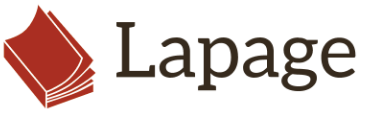

<html><font color="brown", size = "+3"><strong><u> Sommaire </u></strong></font></html>

<ul>
<a href = "#0">Import des librairies</a><br>
<a href = "#I">I. Exploration, nettoyage et rapprochement des fichiers</a>
    <ul>
    <a href = "#products">1.1 Fichier products</a><br>
    <a href = "#customers">1.2 Fichier customers </a><br>
    <a href = "#transactions">1.3 Fichier transactions</a><br>
    <a href = "#fusion">1.4 Rapprochement des fichiers</a><br>
    </ul>
<a href = "#II">II. Indicateurs de vente: CA et nombre de ventes</a>
    <ul>
    <a href = "#global">2.1 Au global</a><br>
    <a href = "#produits">2.2 Par produits</a><br>
    <a href = "#clients">2.3 Par clients</a>
    </ul>
<a href = "#III">III. Clients : analyse des caractéristiques et des achats</a>
    <ul>
    <a href = "#profil">3.1 Profils des clients</a><br>
            <a href = "#age">- âge</a><br>
            <a href = "#sexe">- genre</a><br>
            <a href = "#sessions">- sessions</a><br>
            <a href = "#panier">- paniers moyens</a><br>
    <a href = "#correlations">3.2 Etude des corrélations</a><br>
            <a href = "#sexcat">- genre et catégorie</a><br>
            <a href = "#agepm">- âge et panier moyen</a><br>
            <a href = "#ageca">- âge et CA total</a><br>
            <a href = "#agefreq">- âge et fréquence d'achat</a><br>
            <a href = "#agecat">- âge et catégorie</a><br>
    </ul>
<a href = "#IV">IV. Lien entre les références 0-525 et 2-159</a><br>
<a href = "#V">V. Conclusion</a>
</ul>

<a id = "0"></a><br>
<html><font color='brown', size = "+3"><strong><u> Import des librairies </u></strong></font></html>

In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import binom_test
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import normaltest
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

<a id = "I"></a><br>
<html><font color='brown', size = "+3"><strong><u> I . Exploration, nettoyage et rapprochement des fichiers</u></strong></font></html>

Pour chacun des trois fichiers products, customers, transactions : étude des variables, de la dimension du dataframe, des types de données, 
de l'unicité des clés, des valeurs nulles, des doublons et réalisation des modifications si besoin

<a id = "products"></a><br>
<html><font color='brown', size = "+2"><strong>1.1 Fichier products </strong></font></html>

In [4]:
products = pd.read_csv("products.csv")
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


### Dimensions du dataframe products

In [5]:
products.shape

(3287, 3)

### Type de données du dataframe products

In [6]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

###  Conversion du type de données categ vers object

In [7]:
products["categ"] = products["categ"].astype("object")
products.dtypes

id_prod     object
price      float64
categ       object
dtype: object

###  Etude de la clé id_prod et autres variables

3287 id uniques sur 3287 lignes

In [8]:
products.describe(include = "all")

,id_prod,price,categ
count,3287,3287.000000,3287.0
unique,3287,NaN,3.0
top,0_2017,NaN,0.0
freq,1,NaN,2309.0
mean,NaN,21.856641,NaN
std,NaN,29.847908,NaN
min,NaN,-1.000000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.060000,NaN
75%,NaN,22.990000,NaN


Recherche des prix négatifs.
Une valeur concernée.

In [9]:
products[products["price"]<0]

,id_prod,price,categ
731,T_0,-1.0,0


Nettoyage de la ligne concernée

In [10]:
products.drop(index = 731,inplace= True)

In [11]:
products.shape

(3286, 3)

### Nombre de valeurs nulles

Vérification des valeurs nulles sur le df entier : pas de NaN

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   object 
dtypes: float64(1), object(2)
memory usage: 102.7+ KB


### Nombre de doublons du dataframe products

Vérification des doublons sur le df entier : pas de doublons

In [13]:
doublons_products = products.duplicated()
doublons_products.value_counts()

False    3286
dtype: int64

### Valeurs de la variable "categ"

3 catégories de produits

In [14]:
print(products["categ"].unique())
products["categ"].value_counts()

[0 1 2]


0    2308
1     739
2     239
Name: categ, dtype: int64

<a id = "customers"></a><br>
<html><font color='brown', size = "+2"><strong>1.2 Fichier customers </strong></font></html>

In [15]:
customers = pd.read_csv("customers.csv")
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


### Dimensions du dataframe customers

In [16]:
customers.shape

(8623, 3)

### Type de données du dataframe customers

In [17]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

### Etude de la clé client_id et autres variables

8623 id uniques sur 8623 lignes

In [18]:
customers.describe(include = "all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_7132,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


### Nombre de valeurs nulles

Vérification des valeurs nulles sur le df entier : pas de NaN

In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


### Nombre des doublons du dataframe customers

Vérification des doublons sur le df entier : pas de doublons

In [20]:
doublons_customers = customers.duplicated()
doublons_customers.value_counts()

False    8623
dtype: int64

<a id = "transactions"></a><br>
<html><font color='brown', size = "+2"><strong>1.3 Fichier transactions </strong></font></html>

In [21]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


### Dimensions du dataframe transactions

In [22]:
transactions.shape

(679532, 4)

### Type de données du dataframe transactions

In [23]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

###  Conversion du type de données date

In [24]:
def split_func (row) :
    row = row.split("-")
    row = row[0]
    return row

In [25]:
transactions["date_split"] =  transactions["date"].apply(split_func)

In [26]:
transactions["date_split"].unique()

array(['2022', '2021', '2023', 'test_2021'], dtype=object)

In [27]:
transactions["date_split"].value_counts()

2022         346500
2021         278335
2023          54497
test_2021       200
Name: date_split, dtype: int64

In [28]:
transactions[transactions["date_split"]=="test_2021"]

,id_prod,date,session_id,client_id,date_split
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,test_2021
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,test_2021
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,test_2021
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,test_2021
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,test_2021
...,...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0,test_2021
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,test_2021
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,test_2021
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,test_2021


In [29]:
transactions["date"]  = pd.to_datetime(transactions["date"], errors = "coerce", exact = True)
transactions["date"]  = pd.to_datetime(transactions["date"].dt.strftime('%Y%m%d'), errors = "coerce", exact = True)

In [30]:
transactions[transactions["date"].isnull()].shape

(200, 5)

In [31]:
transactions[transactions["date"].isnull()][["id_prod","session_id","client_id"]].value_counts()

id_prod  session_id  client_id
T_0      s_0         ct_0         106
                     ct_1          94
dtype: int64

In [32]:
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
date_split            object
dtype: object

### Nettoyage des lignes test

In [33]:
transactions.dropna(axis = 0, subset = ["date"], inplace = True )

In [34]:
transactions.shape

(679332, 5)

In [35]:
transactions.drop(columns="date_split", inplace=True)

### Etude des clés session_id, id_prod et client_id

In [36]:
transactions.describe(include = "all", datetime_is_numeric=True)

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,NaN,342315,8600
top,1_369,NaN,s_118668,c_1609
freq,2252,NaN,14,25488
mean,NaN,2022-03-03 03:12:07.300348416,NaN,NaN
min,NaN,2021-03-01 00:00:00,NaN,NaN
25%,NaN,2021-09-08 00:00:00,NaN,NaN
50%,NaN,2022-03-03 00:00:00,NaN,NaN
75%,NaN,2022-08-30 00:00:00,NaN,NaN
max,NaN,2023-02-28 00:00:00,NaN,NaN


- 3266 vs 3287 références : parmis les références enregistrées, certaines n'ont pas été vendues
- 8600 vs 8623 client_id : parmi les clients enregitrés, tous n'ont pas fait d'achat 

In [37]:
set(transactions["id_prod"].to_list()) - set(products["id_prod"].to_list())

{'0_2245'}

In [38]:
products[products["id_prod"] == "0_2245"]

,id_prod,price,categ


- un id_produit non enregistré dans le fichier products

In [39]:
transactions[transactions["id_prod"] == "0_2245"]

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23,s_272266,c_4746
10106,0_2245,2022-07-23,s_242482,c_6713
11727,0_2245,2022-12-03,s_306338,c_5108
15675,0_2245,2021-08-16,s_76493,c_1391
16377,0_2245,2022-07-16,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25,s_80395,c_131
670682,0_2245,2022-03-06,s_175311,c_4167
671286,0_2245,2022-05-16,s_209381,c_4453
675679,0_2245,2022-02-11,s_163405,c_1098


- ce produit a été vendu 221 fois

In [40]:
set(transactions["client_id"].to_list()) - set(customers["client_id"].to_list())

set()

- tous les clients ayant réalisé un achat sont enregistrés dans le fichier customers

### Nombre de valeurs nulles

Vérification des valeurs nulles sur le df entier : pas de NaN

In [41]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


### Nombre de doublons

Vérification des doublons sur le df entier : pas de doublons

In [42]:
transactions.duplicated().value_counts()

False    678512
True        820
dtype: int64

<a id = "fusion"></a><br>
<html><font color='brown', size = "+2"><strong>1.4 Rapprochement des fichiers </strong></font></html>

### Left Join entre le DF transactions et le DF customers

In [43]:
transactions_customers = pd.merge(transactions, customers, on = "client_id", how = "left")

In [44]:
transactions_customers.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,f,1986
1,1_251,2022-02-02,s_158752,c_8534,m,1988
2,0_1277,2022-06-18,s_225667,c_6714,f,1968
3,2_209,2021-06-24,s_52962,c_6941,m,2000
4,0_1509,2023-01-11,s_325227,c_4232,m,1980


- vérification de la complétude après join

In [45]:
transactions_customers.isnull().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
sex           0.0
birth         0.0
dtype: float64

### Left Join entre le DF transactions_customers et le DF products

In [46]:
df_final = pd.merge(transactions_customers, products, on ="id_prod", how = "left")

In [47]:
df_final.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20,s_211425,c_103,f,1986,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,m,1988,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,f,1968,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,m,2000,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,m,1980,4.99,0


- vérification de la complétude après join

In [48]:
print(df_final.isnull().mean())
print(df_final.isnull().value_counts())

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
sex           0.000000
birth         0.000000
price         0.000325
categ         0.000325
dtype: float64
id_prod  date   session_id  client_id  sex    birth  price  categ
False    False  False       False      False  False  False  False    679111
                                                     True   True        221
dtype: int64


- valeurs nulles sur la référence 0_2245

In [49]:
df_final[df_final["price"].isnull()]

,id_prod,date,session_id,client_id,sex,birth,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,m,1940,NaN,NaN
10103,0_2245,2022-07-23,s_242482,c_6713,f,1963,NaN,NaN
11723,0_2245,2022-12-03,s_306338,c_5108,m,1978,NaN,NaN
15670,0_2245,2021-08-16,s_76493,c_1391,m,1991,NaN,NaN
16372,0_2245,2022-07-16,s_239078,c_7954,m,1973,NaN,NaN
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25,s_80395,c_131,m,1981,NaN,NaN
670484,0_2245,2022-03-06,s_175311,c_4167,f,1979,NaN,NaN
671088,0_2245,2022-05-16,s_209381,c_4453,m,1981,NaN,NaN
675480,0_2245,2022-02-11,s_163405,c_1098,m,1986,NaN,NaN


- remplacement des valeurs nulles "price" par la médiane


In [50]:
median = df_final['price'].median()
df_final['price'].fillna(median, inplace=True)
median

13.99

- remplacement des valeurs nulles "categ" par le mode

In [51]:
mode = df_final['categ'].mode()
df_final['categ'].fillna(mode[0], inplace=True)
mode

0    0
dtype: object

- vérification du nombre de valeurs nulles

In [52]:
df_final.isnull().value_counts()

id_prod  date   session_id  client_id  sex    birth  price  categ
False    False  False       False      False  False  False  False    679332
dtype: int64

- on créé une colonne "année-mois" afin de pouvoir facilement étudier les indicateurs aggrégés selon l'année et le mois

In [53]:
df_final['année_mois'] = df_final["date"].dt.strftime('%Y-%m')

<a id = "II"></a><br>
<html><font color='brown', size = "+3"><strong><u> II . Indicateurs de vente: CA et nombre de ventes</u></strong></font></html>

<a id = "global"></a><br>
<html><font color='brown', size = "+2"><strong>2.1 Au global</strong></font></html>

###  Chiffre d'affaire total

In [54]:
ca_total = df_final["price"].sum()
nbr_sales_total =  df_final["price"].count()
print(f'Le chiffre d\'affaire généré depuis {df_final["année_mois"].min()} est de {ca_total} € pour un total de {nbr_sales_total} ventes')

Le chiffre d'affaire généré depuis 2021-03 est de 11856820.47 € pour un total de 679332 ventes


###  Chiffre d'affaire et nombre de ventes par mois

#### Evolution du CA par mois

In [55]:
ca_per_category_per_month= df_final.pivot_table(values = "price", index = "année_mois", columns = "categ", aggfunc=sum, margins=True,margins_name="total")

In [56]:
ca_per_category_per_month.iloc[0:24,3]

année_mois
2021-03    482566.52
2021-04    476305.16
2021-05    493055.39
2021-06    484186.49
2021-07    482891.36
2021-08    482410.70
2021-09    507408.56
2021-10    320896.67
2021-11    516307.63
2021-12    526015.21
2022-01    525408.94
2022-02    535725.39
2022-03    515610.42
2022-04    493194.80
2022-05    517356.44
2022-06    496114.05
2022-07    510951.00
2022-08    506579.19
2022-09    494240.44
2022-10    508057.67
2022-11    496818.83
2022-12    510303.44
2023-01    517638.48
2023-02    456777.69
Name: total, dtype: float64

- CA mensuel moyen

In [57]:
round(ca_per_category_per_month.iloc[0:24,3].mean(),2)

494034.19

#### Evolution du nombre de ventes par mois

In [58]:
nbr_sales_per_category_per_month= df_final.pivot_table(values = "id_prod", index = "année_mois", columns = "categ", aggfunc='count',margins=True,margins_name="total")
nbr_sales_per_category_per_month.iloc[0:24,3]

année_mois
2021-03    28610
2021-04    28457
2021-05    28293
2021-06    26857
2021-07    24742
2021-08    25659
2021-09    33326
2021-10    21606
2021-11    28321
2021-12    32464
2022-01    29348
2022-02    29605
2022-03    29707
2022-04    27616
2022-05    29991
2022-06    28511
2022-07    28682
2022-08    28552
2022-09    28315
2022-10    28974
2022-11    28574
2022-12    28625
2023-01    28945
2023-02    25552
Name: total, dtype: int64

- nombre de ventes mensuelles moyen

In [59]:
round(nbr_sales_per_category_per_month.iloc[0:24,3].mean(),2)

28305.5

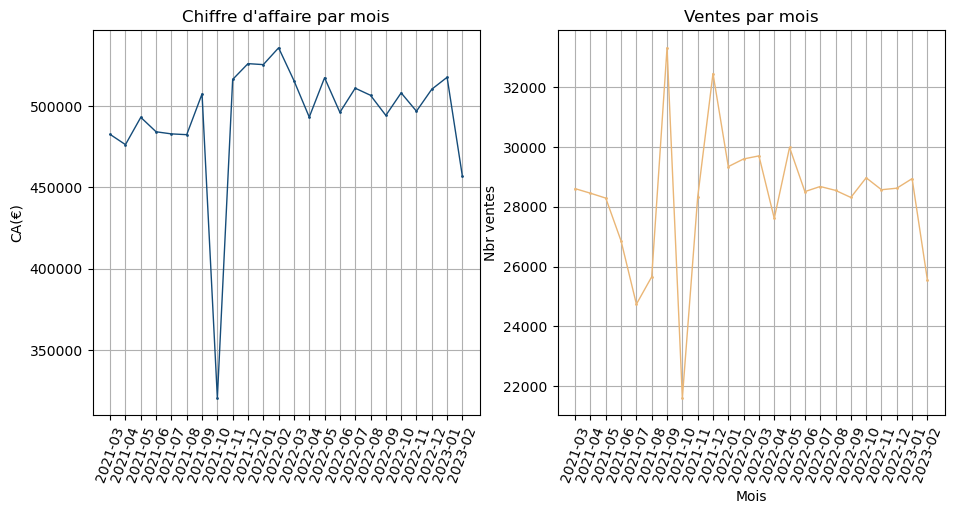

In [60]:
fig = plt.figure(figsize = (11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
y = ca_per_category_per_month.iloc[0:24,3]
y2 = nbr_sales_per_category_per_month.iloc[0:24,3]
ax1.plot(ca_per_category_per_month.iloc[0:24,3].index,y, "o-", color='#154c79',  linewidth = 1, markersize=1)
ax2.plot(nbr_sales_per_category_per_month.iloc[0:24,3].index,y2, "o-", color='#eab676',  linewidth = 1, markersize=1)
ax1.set_title("Chiffre d'affaire par mois")
tick_positions =df_final['année_mois'].unique()
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_positions, rotation = 70)
#ax1.set_xlabel("Mois")
ax1.set_ylabel("CA(€)")
ax1.grid(True)
ax2.set_title("Ventes par mois")
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_positions, rotation = 70)
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nbr ventes")
ax2.grid(True)
plt.show()

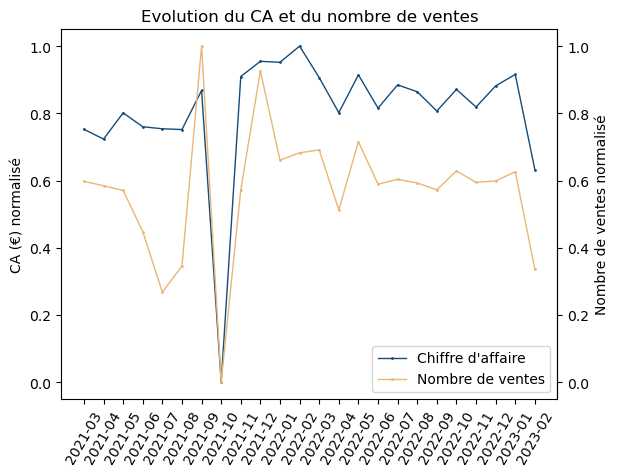

In [61]:

fig = plt.figure()
ax = fig.add_subplot()
y = (ca_per_category_per_month.iloc[0:24,3]-ca_per_category_per_month.iloc[0:24,3].min())/(ca_per_category_per_month.iloc[0:24,3].max()-ca_per_category_per_month.iloc[0:24,3].min())
y2 = (nbr_sales_per_category_per_month.iloc[0:24,3]-nbr_sales_per_category_per_month.iloc[0:24,3].min())/(nbr_sales_per_category_per_month.iloc[0:24,3].max()-nbr_sales_per_category_per_month.iloc[0:24,3].min())
ax.plot(y, "o-", color='#154c79',  linewidth = 1, markersize=1, label = "Chiffre d'affaire")
ax.plot(y2, "o-", color='#eab676',  linewidth = 1, markersize=1, label = "Nombre de ventes")
ax.set_title("Evolution du CA et du nombre de ventes")
ax.set_ylabel("CA (€) normalisé")
tick_positions = df_final['année_mois'].unique()
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 60)
secax = ax.secondary_yaxis("right")
secax.set_ylabel('Nombre de ventes normalisé')
plt.legend()
plt.show()

#### Focus sur le mois d'octobre 2021

In [62]:
ca_per_category_per_day_october= df_final[(df_final["date"]<='2021-10-31')& (df_final["date"]>='2021-10-01')].pivot_table(values = "price", index = "date", columns = "categ", aggfunc=sum)
ca_per_category_per_day_october.fillna(value=0, inplace=True)
ca_per_category_per_day_october["total"] = ca_per_category_per_day_october.apply(np.sum, axis = 1)

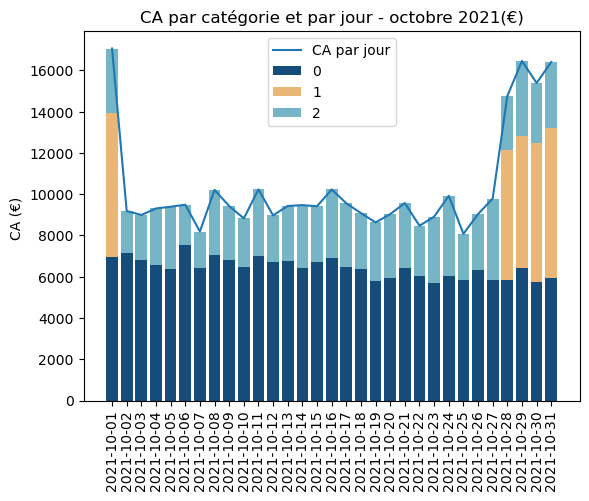

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(ca_per_category_per_day_october.index,ca_per_category_per_day_october.iloc[:,0].values,color="#154c79",label="0")
ax.bar(ca_per_category_per_day_october.index,ca_per_category_per_day_october.iloc[:,1].values,color="#eab676",bottom=np.array(ca_per_category_per_day_october.iloc[:,0].values),label="1")
ax.bar(ca_per_category_per_day_october.index,ca_per_category_per_day_october.iloc[:,2].values,color="#76b5c5",bottom=(np.array(ca_per_category_per_day_october.iloc[:,0].values)+np.array(ca_per_category_per_day_october.iloc[:,1].values)),label="2")
ax.plot(ca_per_category_per_day_october["total"], label = "CA par jour")
ax.legend(["0","2","1"],loc="upper right")
ax.set_title("CA par catégorie et par jour - octobre 2021(€)")
ax.set_ylabel("CA (€) ")
tick_positions = ca_per_category_per_day_october.index
ax.set_xticks(tick_positions)
ax.set_xticklabels(ca_per_category_per_day_october.index.strftime('%Y-%m-%d'), rotation = 90)
plt.legend()
plt.show()

#### Focus sur le mois de février 2023

ca_per_category_per_day_feb= df_final[(df_final["date"]<='2023-02-28')& (df_final["date"]>='2023-02-01')].pivot_table(values = "price", index = "date", columns = "categ", aggfunc="sum")
ca_per_category_per_day_feb.fillna(value=0, inplace=True)
ca_per_category_per_day_feb["total"] = ca_per_category_per_day_feb.apply(np.sum, axis = 1)

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(ca_per_category_per_day_feb.index,ca_per_category_per_day_feb.iloc[:,0].values,color="#154c79",label="0")
ax.bar(ca_per_category_per_day_feb.index,ca_per_category_per_day_feb.iloc[:,1].values,color="#eab676",bottom=np.array(ca_per_category_per_day_feb.iloc[:,0].values),label="1")
ax.bar(ca_per_category_per_day_feb.index,ca_per_category_per_day_feb.iloc[:,2].values,color="#76b5c5",bottom=(np.array(ca_per_category_per_day_feb.iloc[:,0].values)+np.array(ca_per_category_per_day_feb.iloc[:,1].values)),label="2")
ax.plot(ca_per_category_per_day_feb["total"], label = "CA par jour")
ax.legend(["0","2","1"],loc="upper right")
ax.set_title("CA par catégorie et par jour - fevrier 2023(€)")
ax.set_ylabel("CA (€) ")
tick_positions = ca_per_category_per_day_feb.index
ax.set_xticks(tick_positions)
ax.set_xticklabels(ca_per_category_per_day_feb.index.strftime('%Y-%m-%d'), rotation = 90)
plt.legend()
plt.show()

### Etude des références vendues en septembre  et novembre 2021 mais non en octobre

references_september = df_final[(df_final["date"]<='2021-09-30')& (df_final["date"]>='2021-09-01')]["id_prod"].unique()
references_october = df_final[(df_final["date"]<='2021-10-31')& (df_final["date"]>='2021-10-01')]["id_prod"].unique()
references_november = df_final[(df_final["date"]<='2021-11-30')& (df_final["date"]>='2021-11-01')]["id_prod"].unique()

len(set(references_september)-set(references_october))

len(set(references_november)-set(references_october))

difference_september_october = list(set(references_september)-set(references_october))
difference_november_october = list(set(references_november)-set(references_october))

references_september_november = np.intersect1d(difference_september_october, difference_november_october)
len(references_september_november)

references_september_november = df_final[df_final["id_prod"].isin(references_september_november)]
references_september_november

ca_per_category_september_november_sept= references_september_november[(references_september_november["date"]<='2021-09-30')& (references_september_november["date"]>='2021-09-01')].pivot_table(values = "price", index = "année_mois", columns = "categ", aggfunc=sum)
ca_per_category_september_november_sept

ca_per_category_september_november_oct= references_september_november[(references_september_november["date"]<='2021-11-30')& (references_september_november["date"]>='2021-11-01')].pivot_table(values = "price", index = "année_mois", columns = "categ", aggfunc=sum)
ca_per_category_september_november_oct

### Evolution du CA par mois : moyenne mobile

- moyenne mobile par tous les trois mois


In [64]:
ca_per_category_per_month.iloc[0:24,3].rolling(window=3, min_periods=1).mean()

année_mois
2021-03    482566.520000
2021-04    479435.840000
2021-05    483975.690000
2021-06    484515.680000
2021-07    486711.080000
2021-08    483162.850000
2021-09    490903.540000
2021-10    436905.310000
2021-11    448204.286667
2021-12    454406.503333
2022-01    522577.260000
2022-02    529049.846667
2022-03    525581.583333
2022-04    514843.536667
2022-05    508720.553333
2022-06    502221.763333
2022-07    508140.496667
2022-08    504548.080000
2022-09    503923.543333
2022-10    502959.100000
2022-11    499705.646667
2022-12    505059.980000
2023-01    508253.583333
2023-02    494906.536667
Name: total, dtype: float64

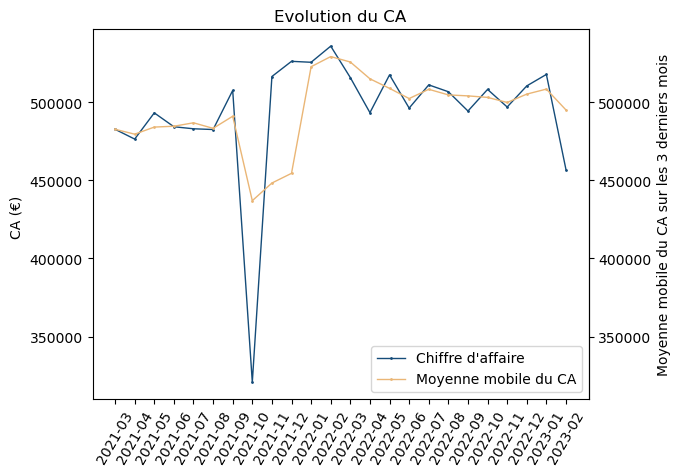

In [65]:
fig = plt.figure()
ax = fig.add_subplot()
y = ca_per_category_per_month.iloc[0:24,3]
y2 = ca_per_category_per_month.iloc[0:24,3].rolling(window=3, min_periods=1).mean()
ax.plot(y, "o-", color='#154c79',  linewidth = 1, markersize=1, label = "Chiffre d'affaire")
ax.plot(y2, "o-", color='#eab676',  linewidth = 1, markersize=1, label = "Moyenne mobile du CA")
ax.set_title("Evolution du CA")
ax.set_ylabel("CA (€) ")
tick_positions = df_final['année_mois'].unique()
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 60)
secax = ax.secondary_yaxis("right")
secax.set_ylabel('Moyenne mobile du CA sur les 3 derniers mois')
plt.legend()
plt.show()

Synthèse de l'analyse du CA et du nombre de ventes au global
- Le chiffre d'affaire généré depuis le 2021-03-01 est de 11856820.47€ pour un total de 679332 ventes
- CA mensuel et nombre de ventes moyens : 494034.19 € pour 28305.5 ventes
- Le mois d’octobre 2021 est marqué par une chute du CA généré par la catégorie 1 (aucune vente entre le 02 et le 27 octobre sur cette catégorie)
- La moyenne mobile calculée sur les trois derniers mois montre une relative stabilité du CA mensuel aux alentours de 500000€, marqué tout de même par une période de croissance du CA entre mars et septembre 2021, un chute liée à la perte de CA du mois d’octobre suivie d’un regain immédiat d’activité, puis une période de faible décroissance depuis un an

<a id = "produits"></a><br>
<html><font color='brown', size = "+2"><strong>2.2 Par produits et par catégories</strong></font></html>

### Chiffre d'affaire et nombre de ventes par catégories

Chiffre d'affaire par catégories

In [66]:
ca_per_category_per_month.loc["total",:]

categ
0        4.422823e+06
1        4.653723e+06
2        2.780275e+06
total    1.185682e+07
Name: total, dtype: float64

Nombre de ventes par catégories

In [67]:
nbr_sales_per_category_per_month.loc["total",:]

categ
0        415680
1        227169
2         36483
total    679332
Name: total, dtype: int64

### Etude de la distribution des prix

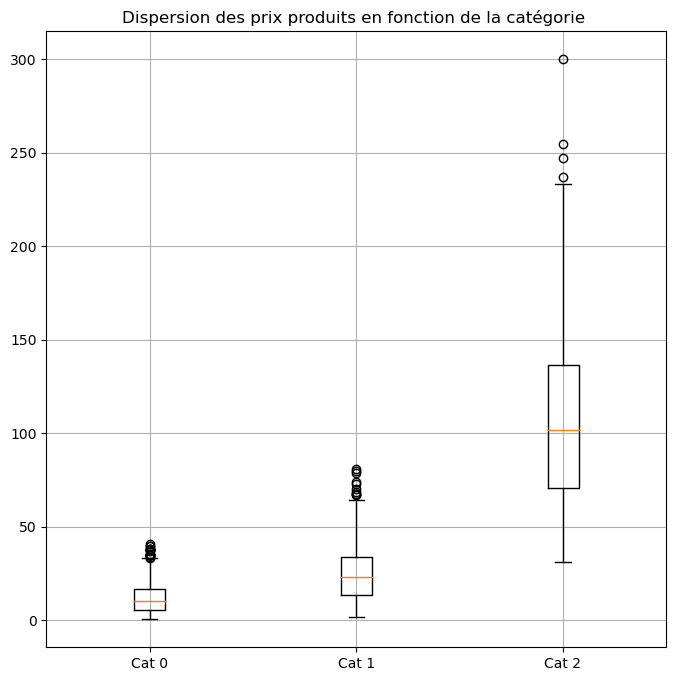

In [68]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.boxplot(products[products["categ"] == 0]["price"].values, positions=[1])
ax.boxplot(products[products["categ"] == 1]["price"].values, positions=[2])
ax.boxplot(products[products["categ"] == 2]["price"].values, positions=[3])
ax.set_title("Dispersion des prix produits en fonction de la catégorie ")
ax.set_xticklabels(['Cat 0', 'Cat 1', 'Cat 2'])
ax.grid(True)
plt.show()

-  la distribution des prix diffère en fonction de la catégorie de produits

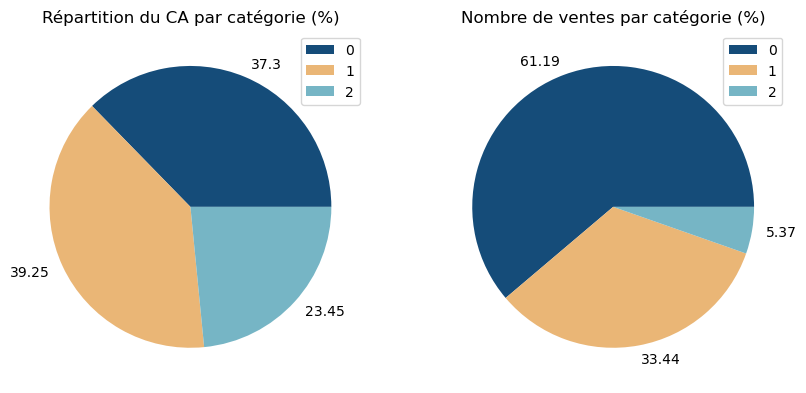

In [69]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.pie(ca_per_category_per_month.loc["total",[0,1,2]], 
        labels =round(ca_per_category_per_month.loc["total",[0,1,2]]/ca_per_category_per_month.loc["total","total"]*100,2),
        colors = ['#154c79','#eab676','#76b5c5'])
ax.legend(ca_per_category_per_month.loc["total",[0,1,2]].index, loc = "upper right")
ax.set_title("Répartition du CA par catégorie (%)")
ax2.pie(nbr_sales_per_category_per_month.loc["total",[0,1,2]], 
        labels =round(nbr_sales_per_category_per_month.loc["total",[0,1,2]]/nbr_sales_per_category_per_month.loc["total","total"]*100,2),
        colors = ['#154c79','#eab676','#76b5c5'])
ax2.legend(nbr_sales_per_category_per_month.loc["total",:].index, loc = "upper right")
ax2.set_title("Nombre de ventes par catégorie (%)")
plt.show()

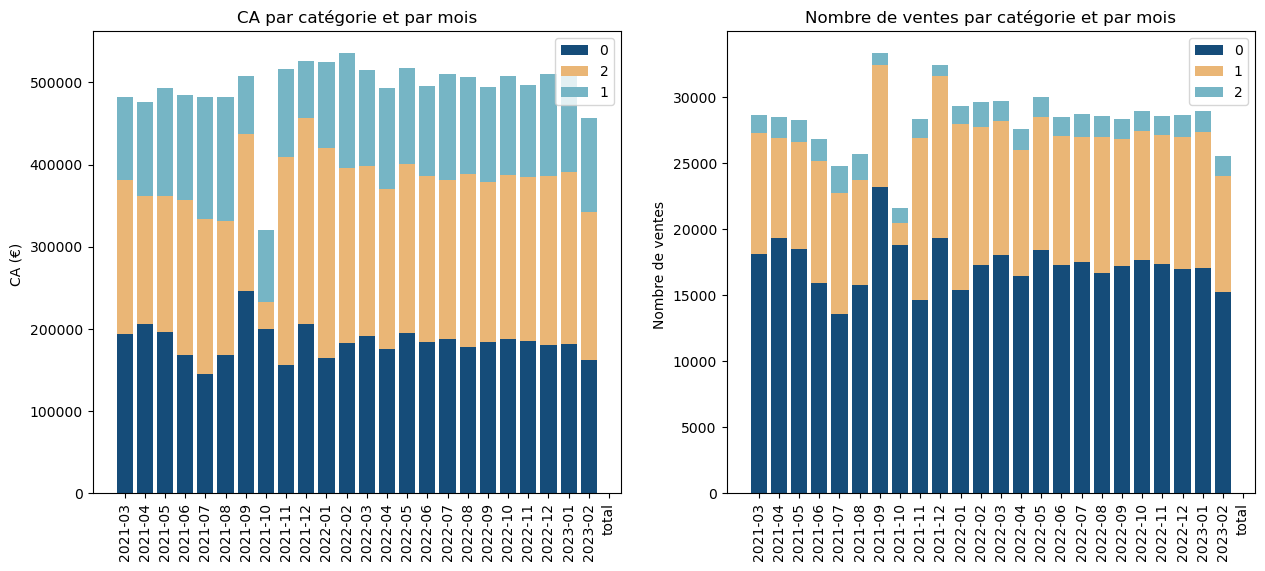

In [70]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.bar(ca_per_category_per_month.iloc[0:24,0:3].index,ca_per_category_per_month.iloc[0:24,0:3].iloc[:,0].values,color="#154c79",label="0")
ax.bar(ca_per_category_per_month.iloc[0:24,0:3].index,ca_per_category_per_month.iloc[0:24,0:3].iloc[:,1].values,color="#eab676",bottom=np.array(ca_per_category_per_month.iloc[0:24,0:3].iloc[:,0].values),label="1")
ax.bar(ca_per_category_per_month.iloc[0:24,0:3].index,ca_per_category_per_month.iloc[0:24,0:3].iloc[:,2].values,color="#76b5c5",bottom=(np.array(ca_per_category_per_month.iloc[0:24,0:3].iloc[:,0].values)+np.array(ca_per_category_per_month.iloc[0:24,0:3].iloc[:,1].values)),label="2")
ax.legend(["0","2","1"],loc="upper right")
ax.set_title("CA par catégorie et par mois")
ax.set_ylabel("CA (€) ")
tick_positions = ca_per_category_per_month.index
ax.set_xticks(tick_positions)
ax.set_xticklabels(ca_per_category_per_month.index, rotation = 90)
ax2.bar(nbr_sales_per_category_per_month.iloc[0:24,0:3].index,nbr_sales_per_category_per_month.iloc[0:24,0:3].iloc[:,0].values,color="#154c79",label="0")
ax2.bar(nbr_sales_per_category_per_month.iloc[0:24,0:3].index,nbr_sales_per_category_per_month.iloc[0:24,0:3].iloc[:,1].values,color="#eab676",bottom=np.array(nbr_sales_per_category_per_month.iloc[0:24,0:3].iloc[:,0].values),label="1")
ax2.bar(nbr_sales_per_category_per_month.iloc[0:24,0:3].index,nbr_sales_per_category_per_month.iloc[0:24,0:3].iloc[:,2].values,color="#76b5c5",bottom=(np.array(nbr_sales_per_category_per_month.iloc[0:24,0:3].iloc[:,0].values)+np.array(nbr_sales_per_category_per_month.iloc[0:24,0:3].iloc[:,1].values)),label="2")
ax2.legend(["0","2","1"],loc="upper right")
ax2.set_title("Nombre de ventes par catégorie et par mois")
ax2.set_ylabel("Nombre de ventes ")
tick_positions = nbr_sales_per_category_per_month.index
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(nbr_sales_per_category_per_month.index, rotation = 90)
plt.legend()
plt.show()

Synthèse de l'analyse du CA et des nombres de ventes par catégorie
- Catégorie 0 : prix les plus faibles, le plus grand nombre de ventes
- Catagorie 1 : prix moyens, catégorie la plus rémunératrice (CA)
- Catégorie 2 : prix les plus élevés
- Les proportions CA  et nombre de ventes par catégorie sont relativement stables dans le temps (exceptions aux mois de septembre et octobre 2021)

### Chiffre d'affaire et nombre de ventes par produit

chiffre d'affaire par produit

In [71]:
ca_per_product= df_final.pivot_table(values = "price", index = "id_prod", aggfunc=sum)
ca_per_product.rename(columns={"price":"CA"}, inplace = True)

In [72]:
ca_per_product.describe()

,CA
count,3266.000000
mean,3630.379813
std,7370.802395
min,0.990000
25%,233.832500
50%,797.220000
75%,3406.200000
max,94893.500000


nombre de ventes par produits

In [73]:
nbr_sales_per_product= df_final.pivot_table(values = "session_id", index = "id_prod", aggfunc="count")
nbr_sales_per_product.rename(columns={"session_id":"Nbr de ventes"}, inplace = True)

In [74]:
nbr_sales_per_product.describe()

,Nbr de ventes
count,3266.000000
mean,208.001225
std,331.311107
min,1.000000
25%,17.000000
50%,57.000000
75%,239.000000
max,2252.000000


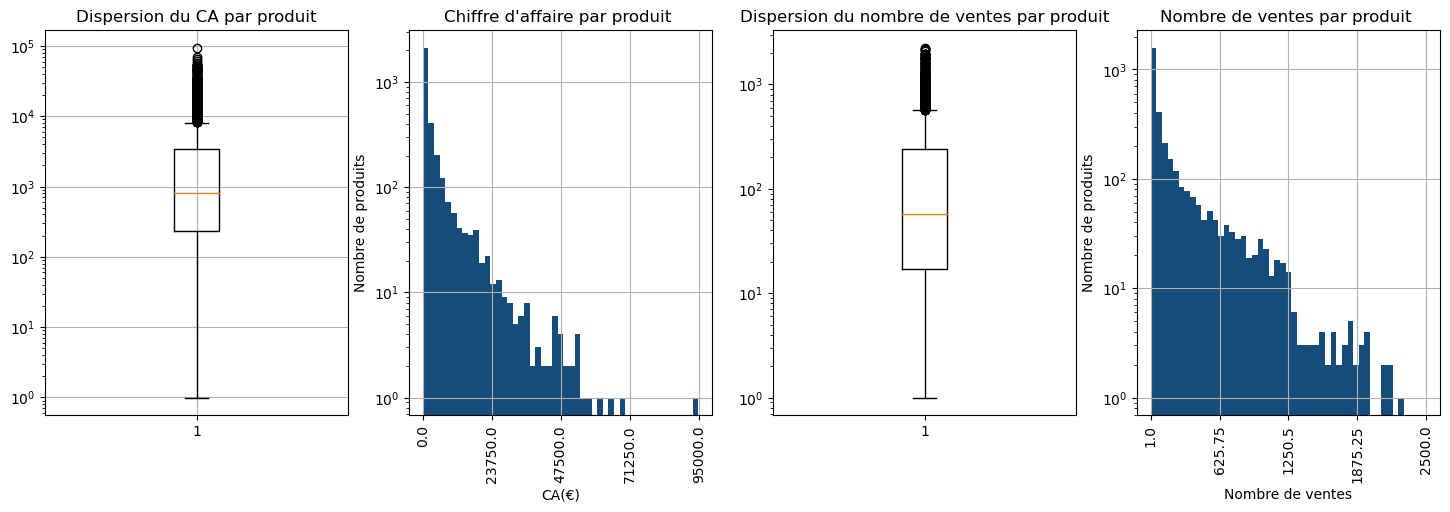

In [75]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
ax.boxplot(ca_per_product["CA"])
ax.set_title("Dispersion du CA par produit")
ax.set_yscale('log')
ax.grid(True)
ax2.hist(ca_per_product["CA"], bins = np.linspace(ca_per_product["CA"].min(),ca_per_product["CA"].max(),50), color = "#154c79")
ax2.set_title("Chiffre d'affaire par produit ")
ax2.set_ylabel("Nombre de produits")
ax2.set_xlabel("CA(€)")
tick_positions =np.linspace(0,95000,5)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_positions, rotation = 90)
ax2.set_yscale('log')
ax2.grid(True)
ax3.boxplot(nbr_sales_per_product["Nbr de ventes"])
ax3.set_title("Dispersion du nombre de ventes par produit")
ax3.set_yscale('log')
ax4.hist(nbr_sales_per_product["Nbr de ventes"], bins = np.linspace(nbr_sales_per_product["Nbr de ventes"].min(),2500,50), color = "#154c79")
ax4.set_title("Nombre de ventes par produit ")
ax4.set_ylabel("Nombre de produits")
ax4.set_xlabel("Nombre de ventes")
tick_positions = np.linspace(nbr_sales_per_product["Nbr de ventes"].min(),2500,5)
ax4.set_xticks(tick_positions)
ax4.set_xticklabels(tick_positions, rotation = 90)
ax4.set_yscale('log')
ax4.grid(True)
plt.show()

In [76]:
CA_par_produit = ca_per_product["CA"].sort_values(ascending=False)
n = len(CA_par_produit)
pareto_ca_produit = np.cumsum((CA_par_produit)) / CA_par_produit.sum()
pareto_ca_produit = pareto_ca_produit.tolist()

In [77]:
percent_product_80_CA =np.interp(0.8, pareto_ca_produit, np.arange(1, len(CA_par_produit)+1))/len(CA_par_produit)*100
percent_product_50_CA = np.interp(0.5, pareto_ca_produit, np.arange(1, len(CA_par_produit)+1))/len(CA_par_produit)*100

80 % du CA est généré par 702 produits, soit 22% des produits 
50 % du CA est généré par 232 produits,  soit 7% des produits 


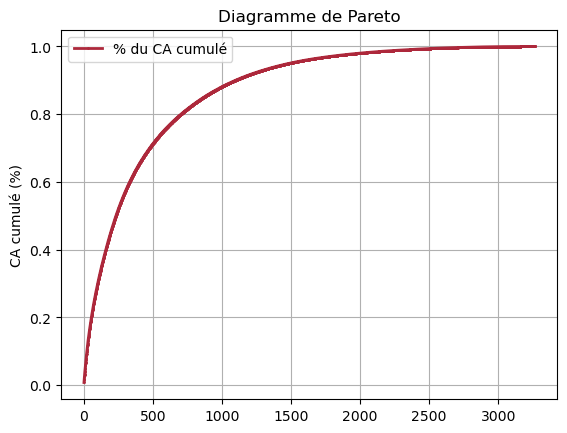

In [78]:
print(f"80 % du CA est généré par 702 produits, soit {round(percent_product_80_CA)}% des produits ")
print(f"50 % du CA est généré par 232 produits,  soit {round(percent_product_50_CA)}% des produits ")

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(pareto_ca_produit, "o-", color='#ad283b',  linewidth = 2, markersize=1, label = "% du CA cumulé")
ax.set_title("Diagramme de Pareto")
ax.set_ylabel("CA cumulé (%)")
ax.grid(True)
plt.legend()
plt.show()

#### Top 10 : nombre de ventes et CA généré

In [79]:
nbr_sales_per_product.sort_values(by = "Nbr de ventes", ascending=False).head(10)

,Nbr de ventes
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
1_403,1960
1_412,1951
1_413,1945
1_406,1939


In [80]:
ca_per_product.sort_values(by = "CA", ascending=False).head(10)

,CA
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


#### Flops : produits ne s'étant pas vendu ou en un seul exemplaire

- produits ne s'étant pas vendus

In [81]:
flops0 = set(products["id_prod"].to_list()) - set(transactions["id_prod"].to_list())
print(len(flops0))
flops0

21


{'0_1014',
 '0_1016',
 '0_1025',
 '0_1062',
 '0_1119',
 '0_1318',
 '0_1620',
 '0_1624',
 '0_1645',
 '0_1780',
 '0_1800',
 '0_2308',
 '0_299',
 '0_310',
 '0_322',
 '0_510',
 '1_0',
 '1_394',
 '2_72',
 '2_86',
 '2_87'}

- produits vendus en un seul exemplaire

In [82]:
flops1 = nbr_sales_per_product[nbr_sales_per_product["Nbr de ventes"]==1]

In [83]:
print(len(flops1))
flops1

18


,Nbr de ventes
id_prod,
0_1151,1
0_1284,1
0_1379,1
0_1498,1
0_1539,1
0_1601,1
0_1633,1
0_1683,1
0_1728,1


Synthèse de l'analyse du CA et du nombre de ventes par catégories et produits:
- Un produit a généré, en moyenne, 3630€ de CA pour 208 ventes sur la période

- TOPS :
    - 80 % du CA est généré par 702 produits, soit 22% des produits 
    - Le produit le plus populaire a été vendu 2252 fois, soit 0,3% des ventes il s’agit d’un produit de la catégorie 1
    - Le produit le plus rémunérateur a généré 94893.50€ de CA, soit 0,8% du CA, il s’agit d’un produit de la catégorie 2

- FLOPS : 
    - 21 produits n’ont pas été vendus sur la période considérée
    - 18 produits n’ont été vendus qu’une fois


<a id = "clients"></a><br>
<html><font color='brown', size = "+2"><strong>2.3 Par clients</strong></font></html>

### Concentration du chiffre d'affaire entre les clients : courbe de Lorentz 

In [84]:
ca_per_client= df_final.pivot_table(values = "price", index = ["client_id"], aggfunc=sum)
ca_per_client.rename(columns={"price":"CA"}, inplace = True)

In [85]:
CA = ca_per_client["CA"]
n = len(CA)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0],lorenz)

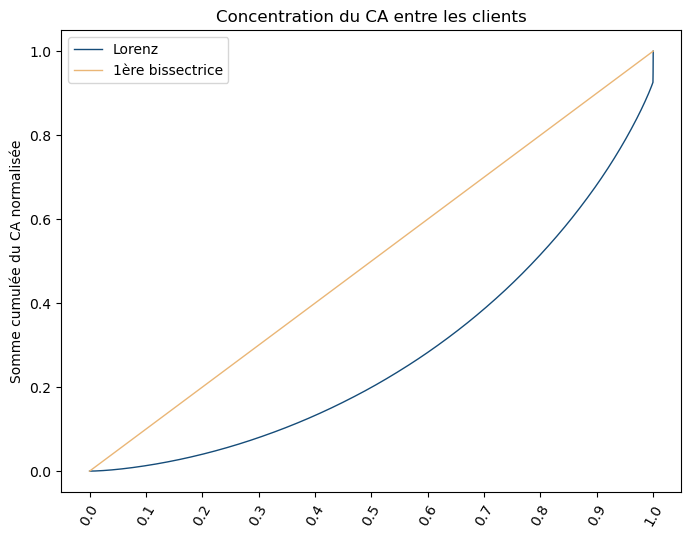

In [86]:
fig_Lorenz = plt.figure(figsize=(8,6))
ax = fig_Lorenz.add_subplot()
ax.plot(np.linspace(0,1,n+1),lorenz,color='#154c79',  linewidth = 1, label = "Lorenz" )
ax.plot(np.linspace(0,1,n+1),np.linspace(0,1,n+1),color='#eab676',  linewidth = 1, label = "1ère bissectrice" )
ax.set_title("Concentration du CA entre les clients")
ax.set_ylabel("Somme cumulée du CA normalisée")
tick_positions =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 60)
plt.legend()
plt.show()

- 50% du CA est concentré par 21% des plus gros clients 

In [87]:
np.interp(0.5, lorenz, np.linspace(0,1,n+1))

0.7890998431710127

- 20% du CA est concentré par 4% des plus gros clients 

In [88]:
np.interp(0.8, lorenz, np.linspace(0,1,n+1))

0.9550613985300844

### Indice de Gini

In [89]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
"GINI: %.4f" %(gini)

'GINI: 0.4464'

### Identification des meilleurs clients

par le chiffre d'affaire

In [90]:
ca_per_client.describe()

,CA
count,8600.000000
mean,1378.700055
std,5182.987897
min,6.310000
25%,547.885000
50%,1027.410000
75%,1779.785000
max,324033.350000


In [91]:
ca_per_client.sort_values(by = "CA", ascending=False).head(10)

,CA
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153682.86
c_3454,113679.90
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


par le nombre de ventes

In [92]:
sales_per_client= df_final.pivot_table(values = "price", index =  ["client_id"], aggfunc='count')
sales_per_client.rename(columns={"price":"Nombre d'achats"}, inplace = True)
sales_per_client.describe()

,Nombre d'achats
count,8600.000000
mean,78.992093
std,312.437204
min,1.000000
25%,27.000000
50%,51.000000
75%,96.000000
max,25488.000000


In [93]:
sales_per_client.sort_values(by = "Nombre d'achats", ascending=False).head(10)

,Nombre d'achats
client_id,
c_1609,25488
c_6714,9187
c_3454,6773
c_4958,5195
c_3263,403
c_2140,402
c_2595,398
c_2077,384
c_1637,380


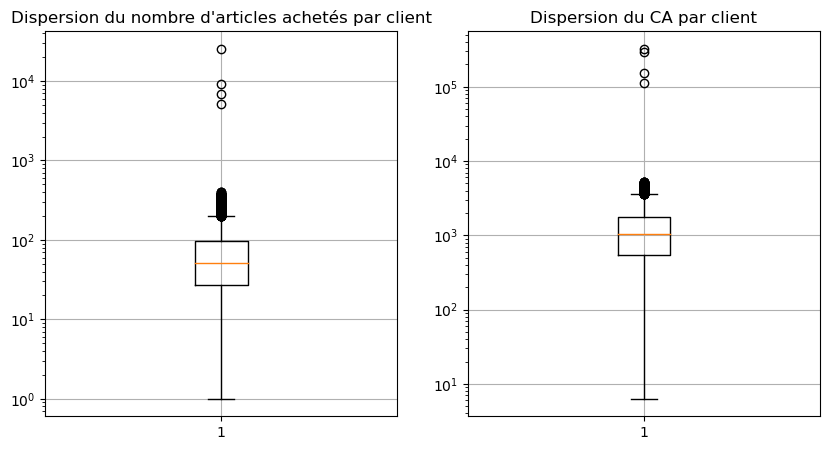

In [94]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.boxplot(sales_per_client["Nombre d'achats"])
ax.set_title("Dispersion du nombre d'articles achetés par client")
ax.grid(True)
ax.set_yscale('log')
ax2.boxplot(ca_per_client["CA"])
ax2.set_title("Dispersion du CA par client")
ax2.grid(True)
ax2.set_yscale('log')
plt.show()

- séparation des 4 plus gros clients pour le reste des analyses (df_final, ca_per_client, sales_per_client / df_outliers, ca_per_client_outliers, sales_per_client_outliers)

In [95]:
df_outliers = df_final[df_final["client_id"].isin(["c_1609","c_4958","c_6714","c_3454"])]

In [96]:
df_final = df_final[~df_final["client_id"].isin(["c_1609","c_4958","c_6714","c_3454"])]

In [97]:
ca_per_client_outliers = ca_per_client.loc[["c_1609","c_4958","c_6714","c_3454"]]
ca_per_client.drop(["c_1609","c_4958","c_6714","c_3454"],inplace=True)

In [98]:
sales_per_client_outliers = sales_per_client.loc[["c_1609","c_4958","c_6714","c_3454"]]
sales_per_client.drop(["c_1609","c_4958","c_6714","c_3454"],inplace=True)

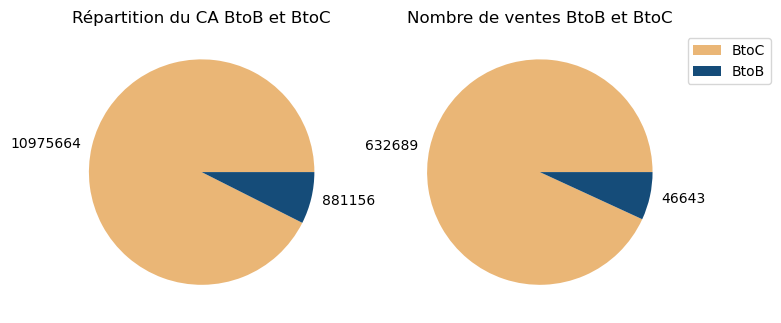

In [99]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.pie([ca_per_client.sum().values[0],ca_per_client_outliers.sum().values[0]], 
        labels = [round(ca_per_client.sum().values[0]),round(ca_per_client_outliers.sum().values[0])],
        colors = ["#eab676","#154c79"],
       )
ax.set_title("Répartition du CA BtoB et BtoC")

ax2.pie([sales_per_client.sum().values[0],sales_per_client_outliers.sum().values[0]], 
        labels = [round(sales_per_client.sum().values[0]),round(sales_per_client_outliers.sum().values[0])],
        colors = ["#eab676","#154c79"],
       )
ax2.legend(["BtoC", "BtoB"], bbox_to_anchor=(1, 1))
ax2.set_title("Nombre de ventes BtoB et BtoC")
plt.show()

### Nombre de ventes et CA généré en fonction du sexe

In [100]:
ca_per_client = pd.merge(ca_per_client,customers,how="left",on="client_id") 

In [101]:
sales_per_client = pd.merge(sales_per_client,customers,how="left",on="client_id") 

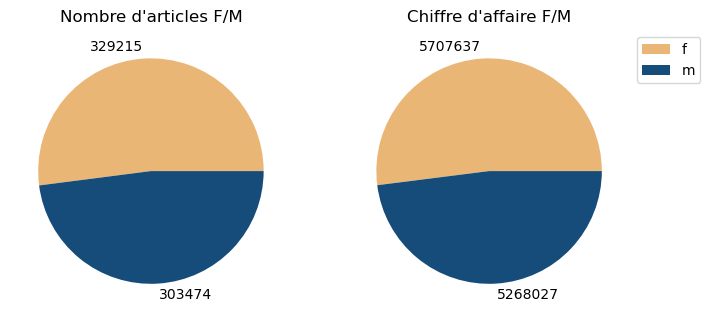

In [102]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.pie(sales_per_client.groupby("sex").sum()["Nombre d'achats"], 
        labels = sales_per_client.groupby("sex").sum()["Nombre d'achats"].values,
        colors = ["#eab676","#154c79"],
       )
ax.set_title("Nombre d'articles F/M")

ax2.pie(ca_per_client.groupby("sex").sum()["CA"], 
        labels = [round(ca_per_client.groupby("sex").sum()["CA"].values[0]),round(ca_per_client.groupby("sex").sum()["CA"].values[1])],
        colors = ["#eab676","#154c79"],
       )
ax2.legend(ca_per_client.groupby("sex").sum()["CA"].index, bbox_to_anchor=(1, 1))
ax2.set_title("Chiffre d'affaire F/M")
plt.show()

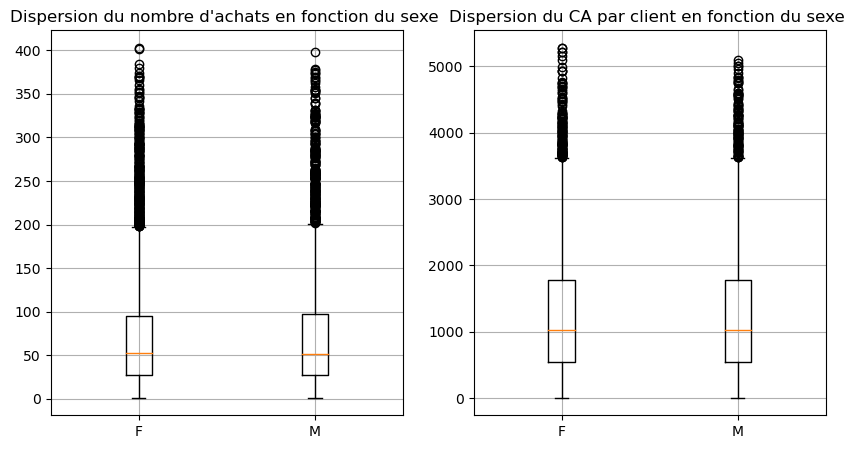

In [103]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.boxplot(sales_per_client[sales_per_client["sex"]== "f"]["Nombre d'achats"],  positions=[1])
ax.boxplot(sales_per_client[sales_per_client["sex"]== "m"]["Nombre d'achats"],  positions=[2])
ax.set_title("Dispersion du nombre d'achats en fonction du sexe ")
ax.set_xticklabels(['F', 'M'])
ax.grid(True)
ax2.boxplot(ca_per_client[ca_per_client["sex"]== "f"]["CA"],  positions=[1])
ax2.boxplot(ca_per_client[ca_per_client["sex"]== "m"]["CA"],  positions=[2])
ax2.set_title("Dispersion du CA par client en fonction du sexe ")
ax2.set_xticklabels(['F', 'M'])
ax2.grid(True)
plt.show()

### Nombre de ventes et CA généré en fonction de l'âge

In [104]:
ca_per_client["age"] = 2023 - ca_per_client["birth"]
ca_per_client.groupby("age").mean()

,CA,birth
age,,
19,1393.624005,2004
20,1228.936414,2003
21,1270.478069,2002
22,1427.981600,2001
23,1213.499706,2000
...,...,...
90,658.542500,1933
91,840.531667,1932
92,703.862500,1931


In [105]:
sales_per_client["age"] = 2023 - sales_per_client["birth"]
sales_per_client.groupby("age").mean()

,Nombre d'achats,birth
age,,
19,34.665904,2004.0
20,30.144828,2003.0
21,31.634483,2002.0
22,34.016000,2001.0
23,32.463235,2000.0
...,...,...
90,40.875000,1933.0
91,51.833333,1932.0
92,42.500000,1931.0


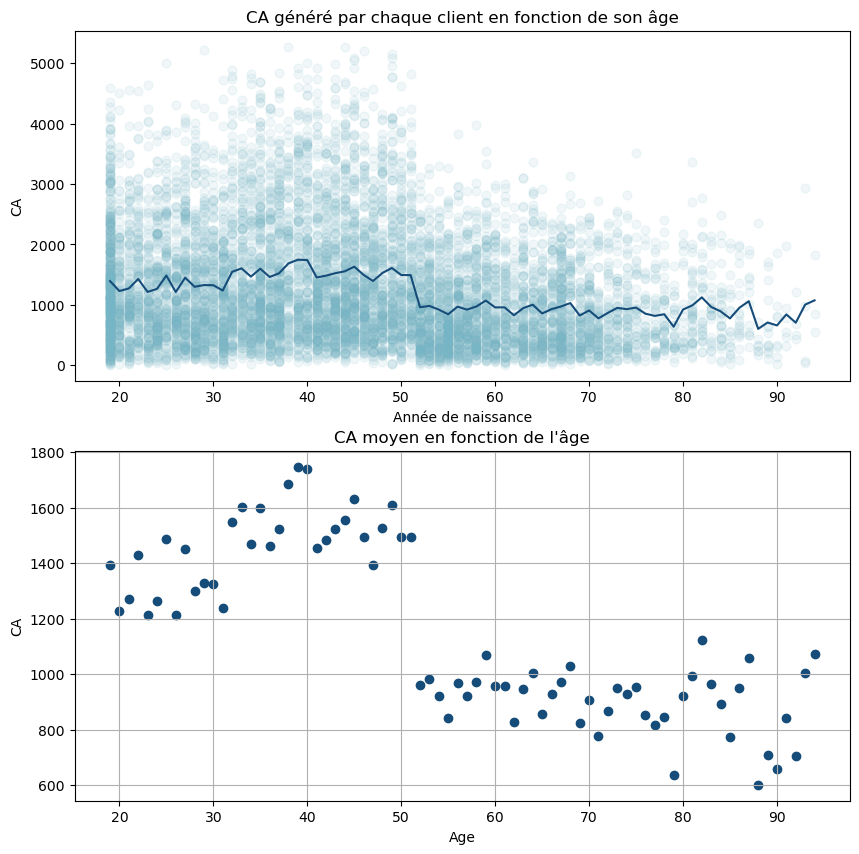

In [106]:
fig_CA_age_scatter = plt.figure(figsize=(10,10))
ax = fig_CA_age_scatter.add_subplot(2,1,1)
ax2 = fig_CA_age_scatter.add_subplot(2,1,2)
ax.scatter(ca_per_client["age"], ca_per_client["CA"], color = "#76b5c5", alpha=0.1, s=40)
ax.plot(ca_per_client.groupby("age").mean().index, ca_per_client.groupby("age").mean()["CA"], color = '#154c79')
ax.set_title("CA généré par chaque client en fonction de son âge")
ax.set_ylabel("CA")
ax.set_xlabel("Année de naissance")
plt.grid(True)

ax2.scatter(ca_per_client.groupby("age").mean().index, ca_per_client.groupby("age").mean()["CA"], color = '#154c79')
ax2.set_title("CA moyen en fonction de l'âge")
ax2.set_ylabel("CA")
ax2.set_xlabel("Age")
plt.grid(True)
plt.show()


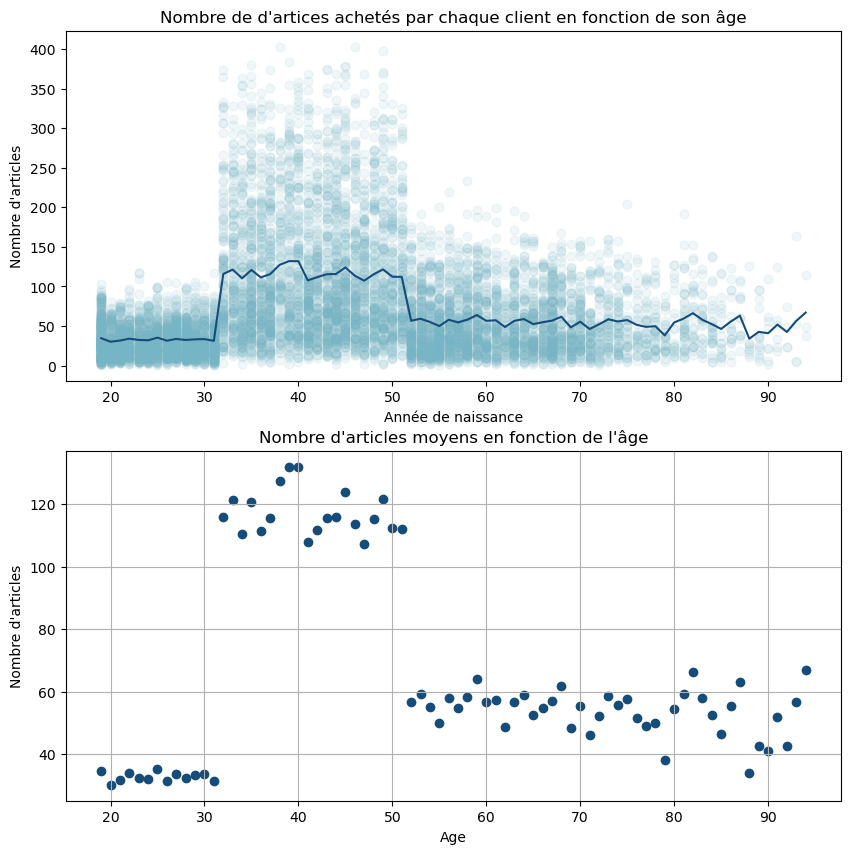

In [107]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax.scatter(sales_per_client["age"], sales_per_client["Nombre d'achats"], color = "#76b5c5", alpha=0.1, s=40)
ax.plot(sales_per_client.groupby("age").mean().index, sales_per_client.groupby("age").mean()["Nombre d'achats"], color = "#154c79")
ax.set_title("Nombre de d'artices achetés par chaque client en fonction de son âge")
ax.set_ylabel("Nombre d'articles")
ax.set_xlabel("Année de naissance")
plt.grid(True)
ax2.scatter(sales_per_client.groupby("age").mean().index, sales_per_client.groupby("age").mean()["Nombre d'achats"], color = "#154c79")
ax2.set_title("Nombre d'articles moyens en fonction de l'âge")
ax2.set_ylabel("Nombre d'articles")
ax2.set_xlabel("Age")
plt.grid(True)
plt.show()


In [108]:
ca_per_client["tranche d'âge"] = pd.cut(ca_per_client["age"],bins = [18,31,51,100])
sales_per_client["tranche d'âge"] = pd.cut(sales_per_client["age"],bins = [18,31,51,100])

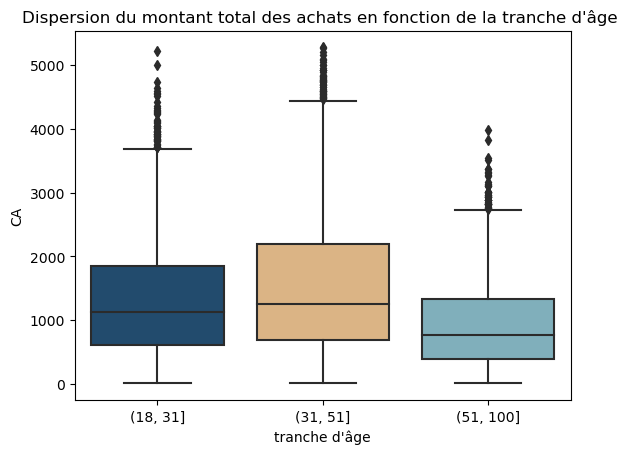

In [109]:
fig_CA_age_boxplots = plt.figure()
sns.boxplot(x='tranche d\'âge',y='CA',data=ca_per_client, palette = ['#154c79','#eab676','#76b5c5'])
plt.title("Dispersion du montant total des achats en fonction de la tranche d'âge ")
plt.show()

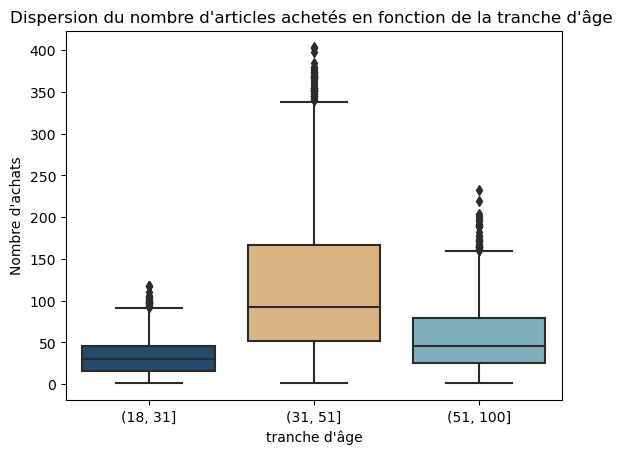

In [110]:
fig = plt.figure()
sns.boxplot(x='tranche d\'âge',y='Nombre d\'achats',data=sales_per_client, palette = ['#154c79','#eab676','#76b5c5'])
plt.title("Dispersion du nombre d'articles achetés en fonction de la tranche d'âge ")
plt.show()

Synthèse de l'analyse du CA et du nombre de ventes par clients :
- Un client a généré en moyenne 1378.70€ de CA pour 79 ventes
- 20% du CA est concentré par 4% des plus gros clients 
- Parmi les clients les plus importants :
    - 4 clients ont généré un nombre beaucoup plus élevé de ventes et de CA que la moyenne : clients BtoB?
    - Ces quatres outliers ont été enlevés des données pour le reste des analyses
- Les graphiques semblent montrer qu'il n'y a pas de différence entre les dépenses effectuées par les hommes et celles effectuées par les femmes
- En revanche qu’il semble exister des différences en fonction de l’âge


<a id = "III"></a><br>
<html><font color='brown', size = "+3"><strong><u> III . Clients : analyse des caractéristiques et des achats</u></strong></font></html>

<a id = "profil"></a> <br>
<html><font color='brown', size = "+2"><strong>3.1 Profils des clients </strong></font></html>

<a id = "age"></a>
### Age

In [111]:
customers_unique = df_final.drop_duplicates(subset="client_id", keep="first").loc[:,["birth","sex"]]
customers_unique["age"] = 2023 - customers_unique["birth"]
customers_unique
customers_unique.loc[:,"age"].describe()

count    8596.000000
mean       44.739646
std        16.910542
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age, dtype: float64

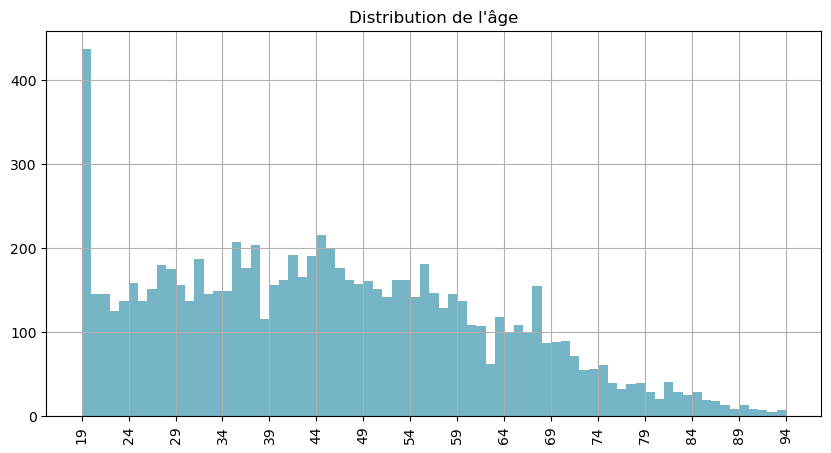

In [112]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.hist(customers_unique["age"], bins = 75, color = "#76b5c5")
tick_positions =np.arange(19,95,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_title("Distribution de l'âge")
ax.grid(True)
plt.show()

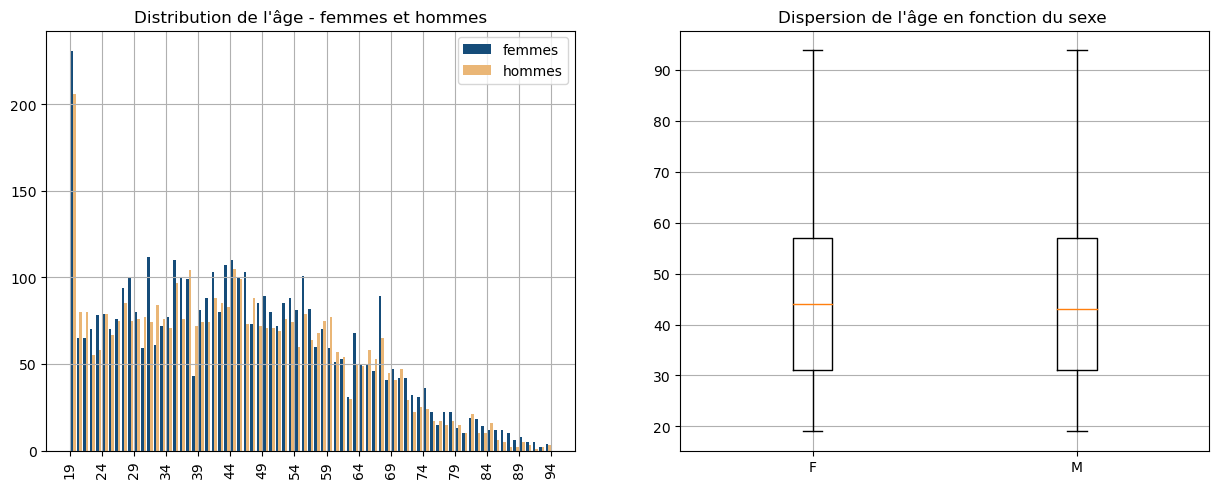

In [113]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax.hist([customers_unique[customers_unique["sex"]== "f"]["age"],customers_unique[customers_unique["sex"]== "m"]["age"]], bins = 75, color = ["#154c79","#eab676"], label = ["femmes","hommes"])
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.grid(True)
ax.legend()
ax.set_title("Distribution de l'âge - femmes et hommes")

ax2.boxplot(customers_unique[customers_unique["sex"]== "f"]["age"],  positions=[1])
ax2.boxplot(customers_unique[customers_unique["sex"]== "m"]["age"],  positions=[2])
ax2.set_title("Dispersion de l'âge en fonction du sexe ")
ax2.set_xticklabels(['F', 'M'])
ax2.grid(True)
plt.show()

- On peut supposer que le nombre important de clients âgés de 19 ans est lié à l'interdiction de paiement en ligne avant 18 ans

#### Test de comparaison de deux sous-populations 

On compare l'âge moyen des clients hommes et femmes  pour mettre en évidence une différence, significative ou non.   
Le test de comparaison se réalise en plusieurs etapes:
- contrôle de la normalité des échantillons  
    - si normalité :
        - test d'égalité des variances 
        - puis test d'égalité des moyennes (t_test)
    - si non normalité,test non paramétrique : Mann et Whitney test


- Les deux échantillons sont_ils (i.i.d) gaussiens ? 

In [114]:
print(normaltest(customers_unique[customers_unique["sex"]== "f"]["age"]))
print(normaltest(customers_unique[customers_unique["sex"]== "m"]["age"]))

NormaltestResult(statistic=248.96750573923038, pvalue=8.657510802513911e-55)
NormaltestResult(statistic=263.76335132725814, pvalue=5.302931230455643e-58)


Les deux échantillons ne suivent pas une distribution normale, 
 - en conséquence on applique le test non paramétrique de Mann et Whitney

In [115]:
test,pvalue_test= mannwhitneyu(customers_unique[customers_unique["sex"]== "f"]["age"],customers_unique[customers_unique["sex"]== "m"]["age"])

print("H0 : μ1 = μ2")
print("H1 : μ1 différent de μ2")

print("la statistique de test = ",test)
if pvalue_test<0.05:
    print("p_value de ",pvalue_test, ", on rejette l'hypothèse nulle, les 2 échantillons n'ont pas la même distribution")
else:
    print("p_value de ",pvalue_test, ",on ne rejette pas l'hypothèse nulle, au seuil de 5%, les 2 échantillons ont la même distribution ")

H0 : μ1 = μ2
H1 : μ1 différent de μ2
la statistique de test =  9068873.5
p_value de  0.09394044761596387 ,on ne rejette pas l'hypothèse nulle, au seuil de 5%, les 2 échantillons ont la même distribution 


<a id = "sexe"></a>
### Proportions hommes / femmes parmi les clients

In [116]:
customers_unique["sex"].value_counts()

f    4478
m    4118
Name: sex, dtype: int64

In [117]:
customers_unique["sex"].value_counts()/len(customers_unique["sex"])

f    0.52094
m    0.47906
Name: sex, dtype: float64

#### Test de comparaison de deux proportions

- On compare les proportions d'hommes et de femmes pour mettre en évidence une différence, significative ou non.   
- On compare la proportion de femmes à la proportion théorique p0 = 0.5 (autant de femmes que d'hommes)
- Les conditions de normalité pour un test de proportions paramétrique sont remplies :
    - n>25, np0>=5, n(1-p0)>= 5 


In [118]:
print("H0 : p1 = p0")
print("H1 : p1 > p0")
pvalue_test = binom_test(len(customers_unique[customers_unique["sex"]== "f"]),n=len(customers_unique["sex"]),alternative="greater")
if pvalue_test<0.05:
    print("p_value de ",pvalue_test, ", on rejette l'hypothèse nulle, la proportion de femmes et supérieure à celle des hommes")
else:
    print("p_value de ",pvalue_test, ",on ne rejette pas l'hypothèse nulle, au seuil de 5%, la proportion de femmes et égale à celle des hommes")

H0 : p1 = p0
H1 : p1 > p0
p_value de  5.383520854415148e-05 , on rejette l'hypothèse nulle, la proportion de femmes et supérieure à celle des hommes


<a id = "sessions"></a>
### Nombre de sessions mensuelles

- certaines sessions s'étalent sur 2 jours d'un mois à un autre, ou d'une année à une autre, on considère uniquement les sessions ayant débuté au jour 1

In [119]:
print("exemple de sessions à cheval sur deux années :")
df_final[df_final["session_id"].isin(["s_143097","s_143108","s_143109"])]

exemple de sessions à cheval sur deux années :


,id_prod,date,session_id,client_id,sex,birth,price,categ,année_mois
27514,0_1091,2022-01-01,s_143097,c_3377,f,1981,9.99,0,2022-01
59755,0_1378,2021-12-31,s_143108,c_2601,m,1997,13.96,0,2021-12
214228,1_538,2022-01-01,s_143108,c_2601,m,1997,27.03,1,2022-01
255876,0_1501,2021-12-31,s_143108,c_2601,m,1997,11.99,0,2021-12
259623,0_1136,2022-01-01,s_143109,c_571,f,1984,3.02,0,2022-01
263059,1_417,2021-12-31,s_143109,c_571,f,1984,20.99,1,2021-12
316392,0_1434,2021-12-31,s_143097,c_3377,f,1981,8.58,0,2021-12
434288,1_412,2021-12-31,s_143108,c_2601,m,1997,16.65,1,2021-12
451630,1_392,2022-01-01,s_143108,c_2601,m,1997,18.11,1,2022-01
502212,1_392,2021-12-31,s_143097,c_3377,f,1981,18.11,1,2021-12


In [120]:
df_sans_doublons_sessions = df_final.drop_duplicates(subset="session_id", keep='first', ignore_index=True)

In [121]:
print("nombre de sessions réalisées en deux ans :")
df_sans_doublons_sessions.shape[0]

nombre de sessions réalisées en deux ans :


319274

In [122]:
print("nombre moyen de sessions par client sur la période étudiée :")
round(len(df_final["session_id"].unique())/len(df_final["client_id"].unique()))

nombre moyen de sessions par client sur la période étudiée :


37

In [123]:
print("sessions par mois :")
df_sans_doublons_sessions.groupby("année_mois").count()["session_id"].describe()

sessions par mois :


count       24.000000
mean     13303.083333
std        734.803133
min      10765.000000
25%      13100.250000
50%      13372.000000
75%      13721.750000
max      14475.000000
Name: session_id, dtype: float64

In [124]:
print("proportion de sessions réalisées par les femmes :")
len(df_sans_doublons_sessions[df_sans_doublons_sessions["sex"]== "f"])/len(df_sans_doublons_sessions["sex"])

proportion de sessions réalisées par les femmes :


0.522551162950945

In [125]:
print("proportion de sessions réalisées par les hommes : ")
len(df_sans_doublons_sessions[df_sans_doublons_sessions["sex"]== "m"])/len(df_sans_doublons_sessions["sex"])

proportion de sessions réalisées par les hommes : 


0.47744883704905505

In [126]:
sessions_per_month_per_sex= df_sans_doublons_sessions.pivot_table(values = "session_id", index = "année_mois", columns = "sex", aggfunc='count')

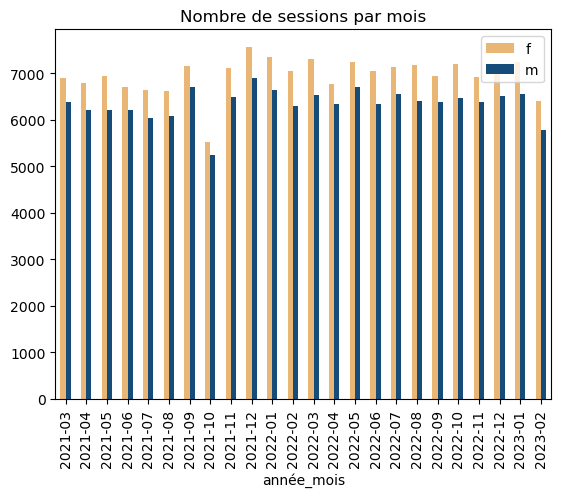

In [127]:
sessions_per_month_per_sex.plot(kind="bar", color = ["#eab676","#154c79"], legend = None, title = "Nombre de sessions par mois")
plt.legend()
plt.show()

#### Test de comparaison de deux proportions

- On compare les proportions de sessions réalisées par les hommes et les femmes pour mettre en évidence une différence, significative ou non.   
- Les conditions de normalité pour un test de proportions paramétrique sont remplies :
    - n>25, np0>=5, n(1-p0)>= 5 
- On compare la proportion de sessions réalisées par les femmes à la proportion théorique p0 = 0.52

In [128]:
print("H0 : p1 = p0")
print("H1 : p1 > p0")
pvalue_test2 = binom_test(len(df_sans_doublons_sessions[df_sans_doublons_sessions["sex"]== "f"]),n=len(df_sans_doublons_sessions["sex"]), p= 0.52, alternative="greater")

if pvalue_test<0.05:
    print("p_value de ",pvalue_test2, ", on rejette l'hypothèse nulle, la proportion de sessions réalisées par les femmes et supérieure à 0.52")
else:
    print("p_value de ",pvalue_test2, ",on ne rejette pas l'hypothèse nulle, au seuil de 5%, la proportion de sessions réalisées par les femmes et égale à 0.52")

H0 : p1 = p0
H1 : p1 > p0
p_value de  0.0019648424955266072 , on rejette l'hypothèse nulle, la proportion de sessions réalisées par les femmes et supérieure à 0.52


<a id = "panier"></a>
### Panier moyen

In [129]:
panier_montants = df_final.pivot_table(values = "price", index = ["client_id","session_id"], aggfunc=sum)
panier_montants.rename(columns={"price":"montant du panier par session"}, inplace = True)

In [130]:
panier_montants

montant du panier par session
client_id session_id                               
c_1       s_105105                             7.99
          s_114737                            92.62
          s_120172                            44.29
          s_134971                            10.30
          s_136532                            13.78
...                                             ...
c_999     s_88239                             15.99
          s_89648                              5.99
          s_92374                              8.57
          s_98289                             11.99
          s_99070                              7.98

[319274 rows x 1 columns]

In [131]:
panier_montants.describe()

,montant du panier par session
count,319274.000000
mean,34.376943
std,32.249942
min,0.620000
25%,15.360000
50%,25.560000
75%,42.980000
max,568.880000


In [132]:
panier_moyen_par_client = panier_montants.groupby("client_id").mean()
panier_moyen_par_client = pd.merge(panier_moyen_par_client,customers,how="left",on="client_id")
panier_moyen_par_client.rename(columns={"montant du panier par session":"panier moyen"}, inplace = True)

In [133]:
panier_moyen_par_client["panier moyen"].describe()

count    8596.000000
mean       40.381932
std        23.268191
min         4.150000
25%        25.367763
50%        32.058396
75%        48.525827
max       259.422500
Name: panier moyen, dtype: float64

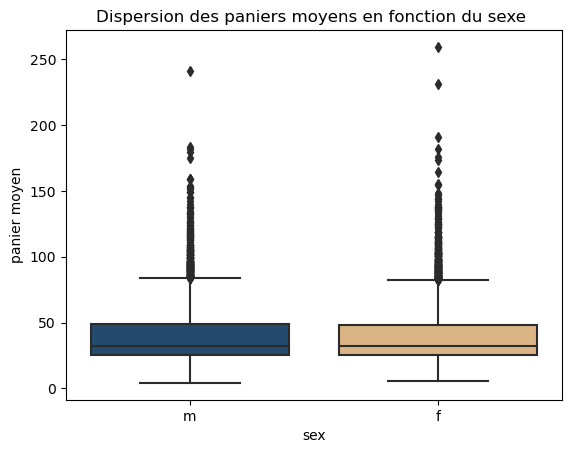

In [134]:
sns.boxplot(x='sex',y='panier moyen',data=panier_moyen_par_client, palette=["#154c79","#eab676"])
plt.title("Dispersion des paniers moyens en fonction du sexe ")
plt.show()

#### Test de comparaison de deux sous-populations 

On compare le panier moyen des clients hommes et femmes  pour mettre en évidence une différence, significative ou non.   
Le test de comparaison se réalise en plusieurs etapes:
- controle de la normalité des échantillons  
    - si normalité :
        - test d'égalité des variances 
        - puis test d'égalité des moyennes (t_test)
    - si non normalité,test non paramétrique : Mann et Whitney test


- Les deux échantillons sont_ils (i.i.d) gaussiens ? 

In [135]:
print(normaltest(panier_moyen_par_client[panier_moyen_par_client["sex"]== "f"]["panier moyen"]))
print(normaltest(panier_moyen_par_client[panier_moyen_par_client["sex"]== "m"]["panier moyen"]))

NormaltestResult(statistic=1875.7940025091184, pvalue=0.0)
NormaltestResult(statistic=1558.6674897533585, pvalue=0.0)


Les deux échantillons ne suivent pas une distribution normale, 
 - en conséquence on applique le test non paramétrique de Mann et Whitney

In [136]:
test,pvalue_test= mannwhitneyu(panier_moyen_par_client[panier_moyen_par_client["sex"]== "f"]["panier moyen"],panier_moyen_par_client[panier_moyen_par_client["sex"]== "m"]["panier moyen"])

print("H0 : μ1 = μ2")
print("H1 : μ1 différent de μ2")

print("la stat de test = ",test)
if pvalue_test<0.05:
    print("p_value de ",pvalue_test, ", on rejette l'hypothèse nulle, les 2 échantillons n'ont pas la même distribution")
else:
    print("p_value de ",pvalue_test, ",on ne rejette pas l'hypothèse nulle, au seuil de 5%, les 2 échantillons ont la même distribution ")

H0 : μ1 = μ2
H1 : μ1 différent de μ2
la stat de test =  9079329.0
p_value de  0.11016961800495856 ,on ne rejette pas l'hypothèse nulle, au seuil de 5%, les 2 échantillons ont la même distribution 


Synthèse concernant le profil des clients et habitudes d'achat :
- 8596 clients actifs
- Moyenne d’âge : 45 ans
- Distribution de l’âge identique entre femmes et hommes 
- Parmi les clients : 52 % de femmes , 48 % d’hommes
- 319274 sessions d’achat ont été réalisées en deux ans, soit 37 par client
- En moyenne, 13303.08 sessions sont réalisées par mois, soit 1,5 sessions par clients
- La proportion de sessions réalisées par les femmes est supérieure à 52%
- Le montant du panier moyen par client est de 40,38 euros, la distribution des paniers moyens est identique entre femmes et hommes

<a id = "correlations"></a> <br>
<html><font color='brown', size = "+2"><strong>3.2 Etude des corrélations</strong></font></html>

<a id = "sexcat"></a>
### Etude de la corrélation entre genre et catégorie

#### Etude qualitatif/qualitatif :  calcul du tableau de contingence, des coefficient ξij et réalisation d'un test du Khi2

Création du tableau de contingence en vu d'un test d'indépendance du khi-2


In [137]:
count = df_final.pivot_table(index = "sex", columns = "categ", values = "id_prod", aggfunc="count", margins=True, margins_name="total")

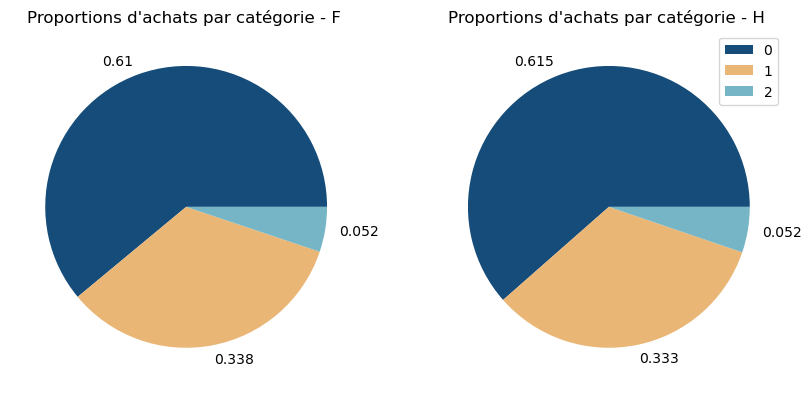

In [138]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.pie(count.loc["f",[0,1,2]], 
        labels =round(count.loc["f",[0,1,2]]/count.loc["f","total"],3),
        colors = ['#154c79','#eab676','#76b5c5'])
ax.set_title("Proportions d'achats par catégorie - F ")
ax2.pie(count.loc["m",[0,1,2]], 
        labels =round(count.loc["m",[0,1,2]]/count.loc["m","total"],3),
        colors = ['#154c79','#eab676','#76b5c5'])
ax2.legend(count.columns[0:3], loc = "upper right")
ax2.set_title("Proportions d'achats par catégorie - H ")
plt.show()

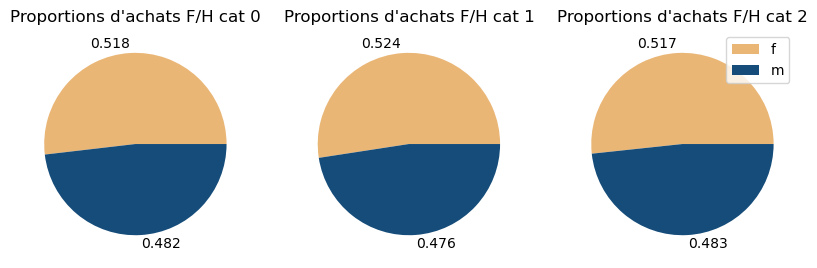

<function matplotlib.pyplot.show(close=None, block=None)>

In [139]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax.pie(count.iloc[0:2,0], 
        labels =round(count.iloc[0:2,0]/count.loc["total",0],3),
        colors = ['#eab676','#154c79'])
ax.set_title("Proportions d'achats F/H cat 0")
ax2.pie(count.iloc[0:2,1], 
        labels =round(count.iloc[0:2,1]/count.loc["total",1],3),
        colors = ['#eab676','#154c79'])
ax2.set_title("Proportions d'achats F/H cat 1")
ax3.pie(count.iloc[0:2,2], 
        labels =round(count.iloc[0:2,2]/count.loc["total",2],3),
        colors = ['#eab676','#154c79'])
ax3.set_title("Proportions d'achats F/H cat 2")
ax3.legend(count.index, loc = "upper right")
plt.show()
plt.show

- Les proportions d’achat par catégorie semblent être les mêmes chez les hommes et les femmes
- Les femmes achètent légèrement plus que les hommes, dans des proportions assez similaires au sein de chaque catégorie,
- D’après les graphiques, il semble ne pas y avoir de lien entre les variables genre et catégorie
    - vérification par réalisation d’un tableau de contingence et d’un test du Khi2

- création du tableau des effectifs théoriques et calcul des ξij

In [140]:
tx = count.loc[:,["total"]]
ty = count.loc[["total"],:]
n = len(df_final)
indep = tx.dot(ty) / n

measure = (count-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

In [141]:
print("tableau de contingence : ")
count

tableau de contingence : 


categ,0,1,2,total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
total,387493,212348,32848,632689


In [142]:
print("tableau des effectifs théoriques : ")
indep

tableau des effectifs théoriques : 


categ,0,1,2,total
sex,,,,
f,201629.091062,110493.697251,17092.211687,329215.0
m,185863.908938,101854.302749,15755.788313,303474.0
total,387493.000000,212348.000000,32848.000000,632689.0


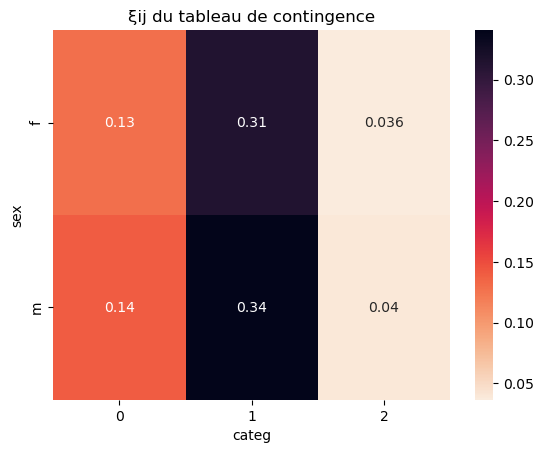

In [143]:
cmap = sns.cm.rocket_r
sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], cmap =cmap)
plt.title("ξij du tableau de contingence")
plt.show()

- C'est au sein de la catégorie 1 que l'écart entre les valeurs observées et les valeurs théoriques en cas d'indépendance des deux variables est le plus important
- Les cases m/cat1 et f/cat1 contribuent le plus à l'hypothèse de non indépendance des variables

Réalisation du test du Khi2

In [144]:
print("H0 = les variables sont indépendantes")

st_chi2, st_p, st_dof, st_exp = chi2_contingency(count.iloc[:-1,:-1])
print ('Khi2=',round(st_chi2),'  p_value=',st_p)

if st_p<0.05:
    print("on rejette l'hypothèse d'indépendance H0, au seuil de 5%")
else:
    print("on ne rejette pas l'hypothèse d'indépensance H0, au seuil de 5%")

H0 = les variables sont indépendantes
Khi2= 20   p_value= 4.1075985631484716e-05
on rejette l'hypothèse d'indépendance H0, au seuil de 5%


<a id = "agepm"></a>
### Etude de la corrélation entre âge et panier moyen

#### Etude quantitative/quantitative avec calcul du coefficient de corrélation :
- Coefficient de Pearson : en cas de distribution normale des variables et relation de type linéaire entre les variables
- Coefficient de Spearman : en cas de rejet de l'hypothèse de normalité, et relation de type monotone entre les variables
- Coeffitient de Kendall (Kendall Tau) : en cas de rejet de l'hypothèse de normalité, et lorsque la relation n'est ni de type linéaire ni de type monotone entre les variables

#### Etude quantitative/qualitative :
- test one_way ANOVA : en cas de distribution normale 
- test  de Kruskal-Wallis : en cas de rejet de l'hypothèse de normalité

In [145]:
panier_moyen_par_client["age"] = 2023 - panier_moyen_par_client["birth"]

- calcul du panier moyen par âge :

In [146]:
panier_moyen_par_client.groupby("age").mean()

,panier moyen,birth
age,,
19,69.198101,2004
20,71.364109,2003
21,67.475174,2002
22,74.247819,2001
23,67.701201,2000
...,...,...
90,29.076604,1933
91,26.755820,1932
92,33.002654,1931


In [147]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax.scatter(panier_moyen_par_client["age"], panier_moyen_par_client["panier moyen"], color = "#76b5c5", alpha=0.1, s=40)
ax.plot(panier_moyen_par_client.groupby("age").mean().index, panier_moyen_par_client.groupby("age").mean()["panier moyen"], color = "#154c79")
ax.set_title("Panier moyen de chaque client en fonction de son âge")
ax.set_ylabel("Panier moyen")
ax.set_xlabel("Age")
plt.grid(True)
ax2.scatter(panier_moyen_par_client.groupby("age").mean().index, panier_moyen_par_client.groupby("age").mean()["panier moyen"], color = "#154c79")
ax2.set_title("Panier moyen en fonction de l'âge")
ax2.set_ylabel("Panier moyen")
ax2.set_xlabel("Age")
plt.grid(True)

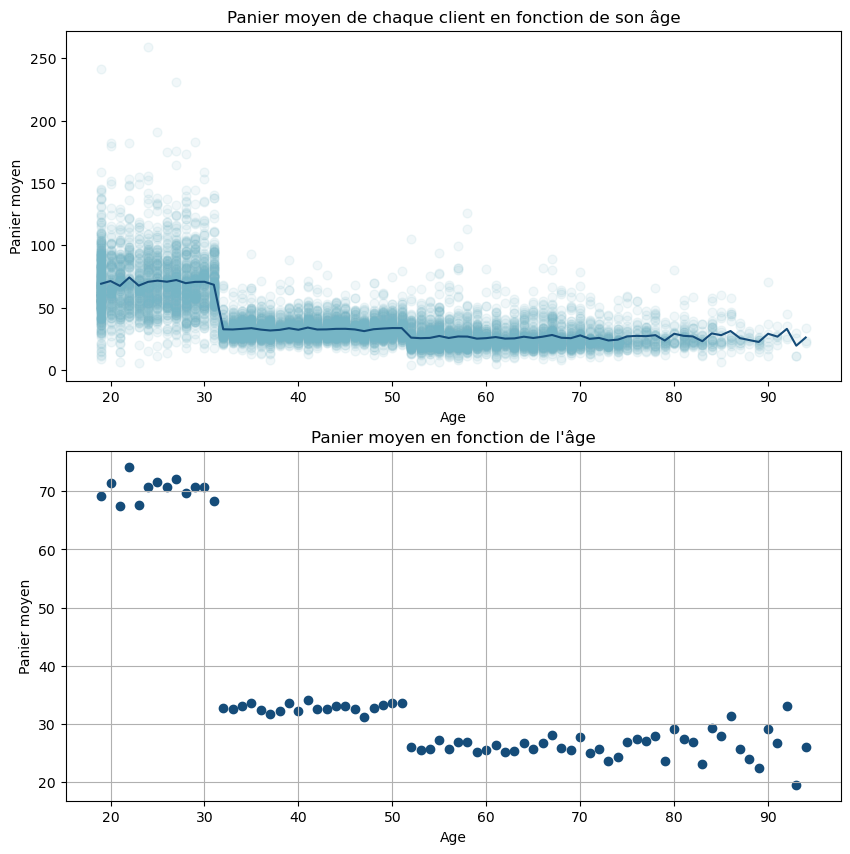

In [148]:
plt.show()

In [149]:
panier_moyen_par_client["tranche d'âge"] = pd.cut(panier_moyen_par_client["age"],bins = [18,31,51,100])

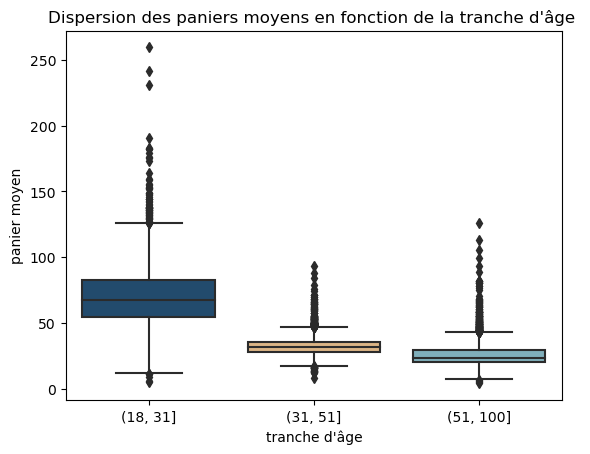

In [150]:
sns.boxplot(x='tranche d\'âge',y='panier moyen',data=panier_moyen_par_client, palette = ['#154c79','#eab676','#76b5c5'])
plt.title("Dispersion des paniers moyens en fonction de la tranche d'âge ")
plt.show()

#### Calcul du coefficient de corrélation

- Les variables suivent-elles une distribution normale ? 

In [151]:
normaltest(panier_moyen_par_client["age"])

NormaltestResult(statistic=504.23834085051374, pvalue=3.2065314382236354e-110)

In [152]:
normaltest(panier_moyen_par_client["panier moyen"])

NormaltestResult(statistic=3422.0962533084103, pvalue=0.0)

Nos variables ne suivent pas une distribution normale. D'après le scatter plot, la relation est de type monotone, on peut donc utiliser le coefficient de corrélation de Spearman

In [153]:
coeff1, pvalue1 = spearmanr(panier_moyen_par_client["age"], panier_moyen_par_client["panier moyen"])

In [154]:
print('Coefficient de Spearman : %.3f' % coeff1)
print(f'P_value inférieure à 0.05 ? : {pvalue1 < 0.05}, pvalue :  {pvalue1}')

Coefficient de Spearman : -0.701
P_value inférieure à 0.05 ? : True, pvalue :  0.0


#### Comparaison des paniers moyens des 3 groupes en fonction de la tranche d'âge

In [155]:
panier_moyen_par_tranche_age = panier_moyen_par_client.groupby("age").mean()

In [156]:
panier_moyen_par_tranche_age["tranche d'âge"] = pd.cut(panier_moyen_par_tranche_age.index,bins = [18,31,51,100])

- Les variables suivent-elles une distribution normale ? 

In [157]:
normaltest(panier_moyen_par_tranche_age["panier moyen"])

NormaltestResult(statistic=24.625638392107092, pvalue=4.493767163567163e-06)

Le test de Kruskal-Wallis est souvent utilisé comme une alternative à l'ANOVA dans le cas où l'hypothèse de normalité n'est pas acceptable.


In [158]:
tranches_d_age = panier_moyen_par_tranche_age["tranche d\'âge"].unique()

In [159]:
coeff2, pvalue2 = kruskal(panier_moyen_par_tranche_age[panier_moyen_par_tranche_age["tranche d\'âge"] == tranches_d_age[0]]["panier moyen"], panier_moyen_par_tranche_age[panier_moyen_par_tranche_age["tranche d\'âge"] == tranches_d_age[1]]["panier moyen"],panier_moyen_par_tranche_age[panier_moyen_par_tranche_age["tranche d\'âge"] == tranches_d_age[2]]["panier moyen"])

In [160]:
tranches_d_age = panier_moyen_par_client["tranche d\'âge"].unique()

In [161]:
print('Statistique de Kruskal-Wallis : %.3f' % coeff2)
print(f'P_value inférieure à 0.05 ? : {pvalue2 < 0.05}, pvalue :  {pvalue2}, rejet de l’hypothèse d’égalité des médianes HO, au seuil de 5%')

Statistique de Kruskal-Wallis : 57.905
P_value inférieure à 0.05 ? : True, pvalue :  2.667351151300531e-13, rejet de l’hypothèse d’égalité des médianes HO, au seuil de 5%


D'après le calcul du coefficient de Spearman et la réalisation du test de Kruskal-Wallis, il existe une corrélation entre les variables âge et panier moyen.

<a id = "ageca"></a>
### Etude de la corrélation entre âge et montant total des achats

#### Etude quantitative/quantitative avec calcul du coefficient de corrélation :
- Coefficient de Pearson : en cas de distribution normale des variables et relation de type linéaire entre les variables
- Coefficient de Spearman : en cas de rejet de l'hypothèse de normalité, et relation de type monotone entre les variables
- Coeffitient de Kendall (Kendall Tau) : en cas de rejet de l'hypothèse de normalité, et lorsque la relation n'est ni de type linéaire ni de type monotone entre les variables

#### Etude quantitative/qualitative :
- test one_way ANOVA : en cas de distribution normale 
- test  de Kruskal-Wallis : en cas de rejet de l'hypothèse de normalité

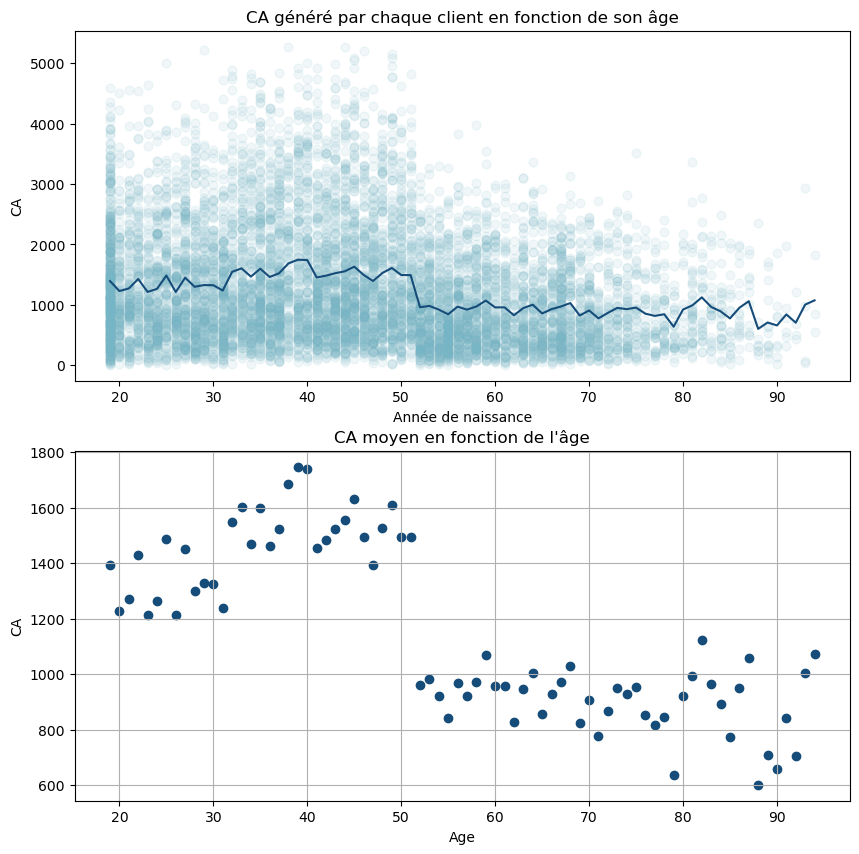

In [162]:
fig_CA_age_scatter

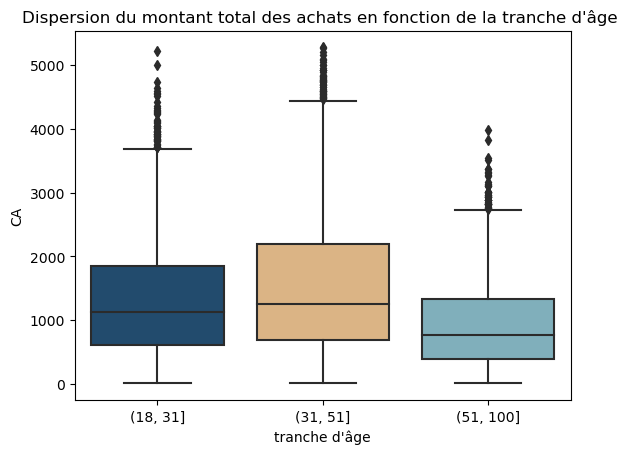

In [163]:
fig_CA_age_boxplots

#### Calcul du coefficient de corrélation

- Les variables suivent-elles une distribution normale ? 

In [164]:
normaltest(ca_per_client["CA"])

NormaltestResult(statistic=1459.1857295562747, pvalue=0.0)

In [165]:
normaltest(ca_per_client["age"])

NormaltestResult(statistic=504.23834085051374, pvalue=3.2065314382236354e-110)

Nos variables ne suivent pas une distribution normale, d'après le scatter plot, la relation n'est ni de type linéaire, ni de type monotone, on peut donc utiliser le coefficient de corrélation de Kendall

In [166]:
coeff3, pvalue3 = kendalltau(ca_per_client["age"], ca_per_client["CA"])

In [167]:
print('Kendall correlation coefficient : %.3f' % coeff3)
print(f'P_value inférieure à 0.05 ? : {pvalue3 < 0.05}, pvalue :  {pvalue3}')

Kendall correlation coefficient : -0.124
P_value inférieure à 0.05 ? : True, pvalue :  1.5461123548141493e-65


#### Comparaison des 3 groupes en fonction de la tranche d'âge

Le test de Kruskal-Wallis est souvent utilisé comme une alternative à l'ANOVA dans le cas où l'hypothèse de normalité n'est pas acceptable.

In [168]:
tranches_d_age = ca_per_client["tranche d\'âge"].unique()

In [169]:
coeff4, pvalue4 = kruskal(ca_per_client[ca_per_client["tranche d\'âge"] == tranches_d_age[0]]["CA"], ca_per_client[ca_per_client["tranche d\'âge"] == tranches_d_age[1]]["CA"], ca_per_client[ca_per_client["tranche d\'âge"] == tranches_d_age[2]]["CA"])

In [170]:
print('Statistique de Kruskal : %.3f' % coeff4)
print(f'P_value inférieure à 0.05 ? : {pvalue4 < 0.05}, pvalue :  {pvalue4}, rejet de l’hypothèse d’égalité des médianes HO, au seuil de 5%')

Statistique de Kruskal : 613.430
P_value inférieure à 0.05 ? : True, pvalue :  6.241302041405049e-134, rejet de l’hypothèse d’égalité des médianes HO, au seuil de 5%


D'après le calcul du coefficient de Kendall et la réalisation du test de Kruskal-Wallis, il existe une corrélation entre les variables âge et montant des achats.

<a id = "agefreq"></a>
### Etude corrélation entre l'âge et la fréquence des achats

#### Etude quantitative/quantitative avec calcul du coefficient de corrélation :
- Coefficient de Pearson : en cas de distribution normale des variables et relation de type linéaire entre les variables
- Coefficient de Spearman : en cas de rejet de l'hypothèse de normalité, et relation de type monotone entre les variables
- Coeffitient de Kendall (Kendall Tau) : en cas de rejet de l'hypothèse de normalité, et lorsque la relation n'est ni de type linéaire ni de type monotone entre les variables

#### Etude quantitative/qualitative :
- test one_way ANOVA : en cas de distribution normale 
- test  de Kruskal-Wallis : en cas de rejet de l'hypothèse de normalité

In [171]:
sessions_per_month_per_client= df_sans_doublons_sessions.pivot_table(values = "session_id", index = "client_id", columns = "année_mois", aggfunc='count')
sessions_per_month_per_client.fillna(value=0, inplace=True)
sessions_per_month_per_client["total"] = sessions_per_month_per_client.apply(np.sum, axis = 1)/24
sessions_per_month_per_client = pd.merge(sessions_per_month_per_client,customers,on="client_id")
sessions_per_month_per_client["age"] = 2023 - sessions_per_month_per_client["birth"]

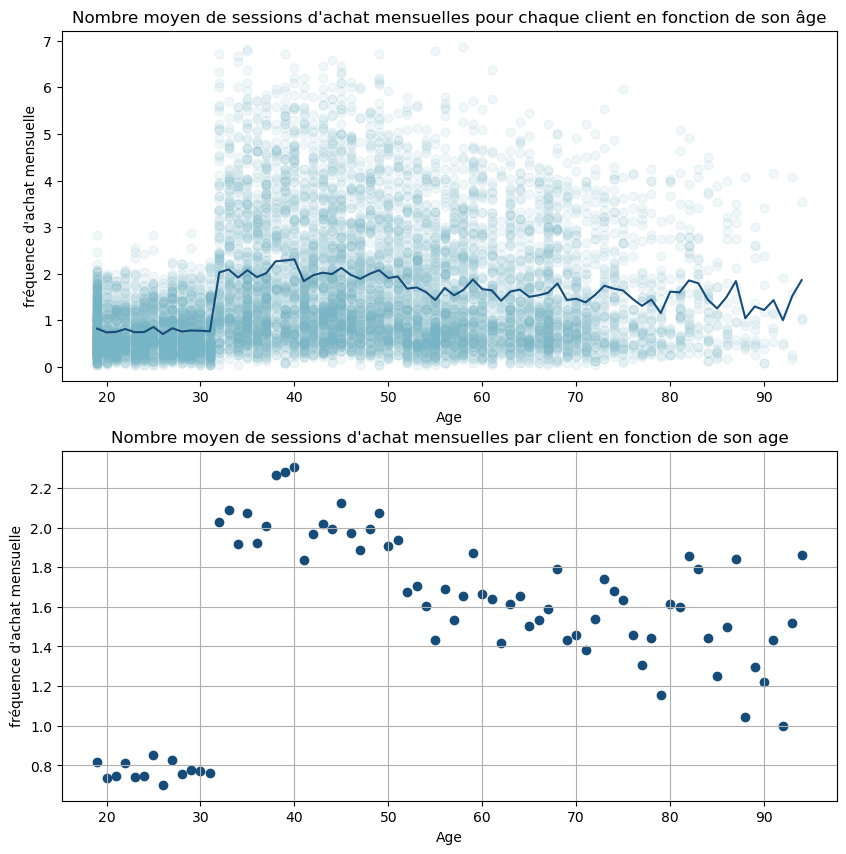

In [172]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax.scatter(sessions_per_month_per_client["age"], sessions_per_month_per_client["total"], color = "#76b5c5", alpha=0.1, s=40)
ax.plot(sessions_per_month_per_client.groupby("age").mean().index, sessions_per_month_per_client.groupby("age").mean()["total"], color = "#154c79")
ax.set_title("Nombre moyen de sessions d'achat mensuelles pour chaque client en fonction de son âge")
ax.set_ylabel("fréquence d'achat mensuelle")
ax.set_xlabel("Age")
plt.grid(True)
ax2.scatter(sessions_per_month_per_client.groupby("age").mean().index, sessions_per_month_per_client.groupby("age").mean()["total"], color = "#154c79")
ax2.set_title("Nombre moyen de sessions d'achat mensuelles par client en fonction de son age")
ax2.set_ylabel("fréquence d'achat mensuelle")
ax2.set_xlabel("Age")
plt.grid(True)
plt.show()

In [173]:
sessions_per_month_per_client["tranche d'âge"] = pd.cut(sessions_per_month_per_client["age"],bins = [18,31,51,100])

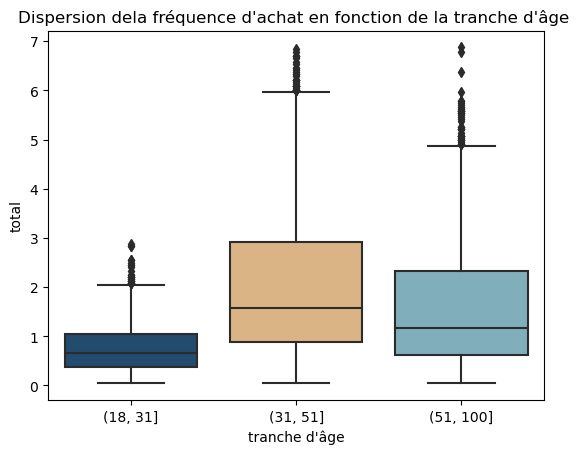

In [174]:
sns.boxplot(x='tranche d\'âge',y='total',data=sessions_per_month_per_client, palette = ['#154c79','#eab676','#76b5c5'])
plt.title("Dispersion dela fréquence d'achat en fonction de la tranche d'âge ")
plt.show()

#### Calcul du coefficient de corrélation

- Les deux variables suivent-elles une distribution normale ? 

In [175]:
normaltest(sessions_per_month_per_client["total"])

NormaltestResult(statistic=1815.0827453380457, pvalue=0.0)

In [176]:
normaltest(sessions_per_month_per_client["age"])

NormaltestResult(statistic=504.23834085051374, pvalue=3.2065314382236354e-110)

Nos variables ne suivent pas une distribution normale, d'après le scatter plot, la relation n'est ni de type linéaire, ni de type monotone, on peut donc utiliser le coefficient de corrélation de Kendall

In [177]:
coeff5, pvalue5 = kendalltau(sessions_per_month_per_client["age"], sessions_per_month_per_client["total"])

In [178]:
print('Kendall correlation coefficient : %.3f' % coeff5)
print(f'P_value inférieure à 0.05 ? : {pvalue5 < 0.05}, pvalue :  {pvalue5}')

Kendall correlation coefficient : 0.143
P_value inférieure à 0.05 ? : True, pvalue :  2.7867336513362433e-85


#### Comparaison des 3 groupes en fonction de la tranche d'âge

Kruskal-Wallis est souvent utilisé comme une alternative à l'ANOVA dans le cas où l'hypothèse de normalité n'est pas acceptable.

In [179]:
tranches_d_age = sessions_per_month_per_client["tranche d\'âge"].unique()

In [180]:
coeff6, pvalue6 = kruskal(sessions_per_month_per_client[sessions_per_month_per_client["tranche d\'âge"] == tranches_d_age[0]]["total"],sessions_per_month_per_client[sessions_per_month_per_client["tranche d\'âge"] == tranches_d_age[1]]["total"], sessions_per_month_per_client[sessions_per_month_per_client["tranche d\'âge"] == tranches_d_age[2]]["total"])

In [181]:
print('Statistique de Kruskal : %.3f' % coeff6)
print(f'P_value inférieure à 0.05 ? : {pvalue6 < 0.05}, pvalue :  {pvalue6}, rejet de l’hypothèse d’égalité des médianes HO, au seuil de 5%')

Statistique de Kruskal : 1425.848
P_value inférieure à 0.05 ? : True, pvalue :  2.40515754508474e-310, rejet de l’hypothèse d’égalité des médianes HO, au seuil de 5%


<a id = "agecat"></a>
###  Etude de la corrélation entre âge et catégorie

#### Etude qualitatif/qualitatif :  
- calcul du tableau de contingence, des coefficient ξij

calcul des proportions d'achat par catégorie en fonction de l'âge :

In [182]:
nbr_products_per_category_per_client = df_final.pivot_table(index = "client_id", columns = "categ", values = "id_prod", aggfunc = "count", margins=True,margins_name="total")

In [183]:
nbr_products_per_category_per_client = pd.merge(nbr_products_per_category_per_client, customers, how = "left", on = "client_id")

In [184]:
nbr_products_per_category_per_client["age"] = 2023 - nbr_products_per_category_per_client["birth"]
nbr_products_per_category_per_client.drop(columns=["birth","sex","client_id"], inplace=True)
nbr_products_per_category_per_client.set_index("age", drop = True,  inplace = True)

In [185]:
nbr_products_per_category_per_client.fillna(0, inplace=True)

In [186]:
def proportion_categ (column) :
    column = column/nbr_products_per_category_per_client["total"]
    return column

In [187]:
proportion_products_per_category_per_client = nbr_products_per_category_per_client.iloc[:,0:4].apply(proportion_categ)

In [188]:
proportion_products_per_category_per_client=proportion_products_per_category_per_client.groupby("age").mean()

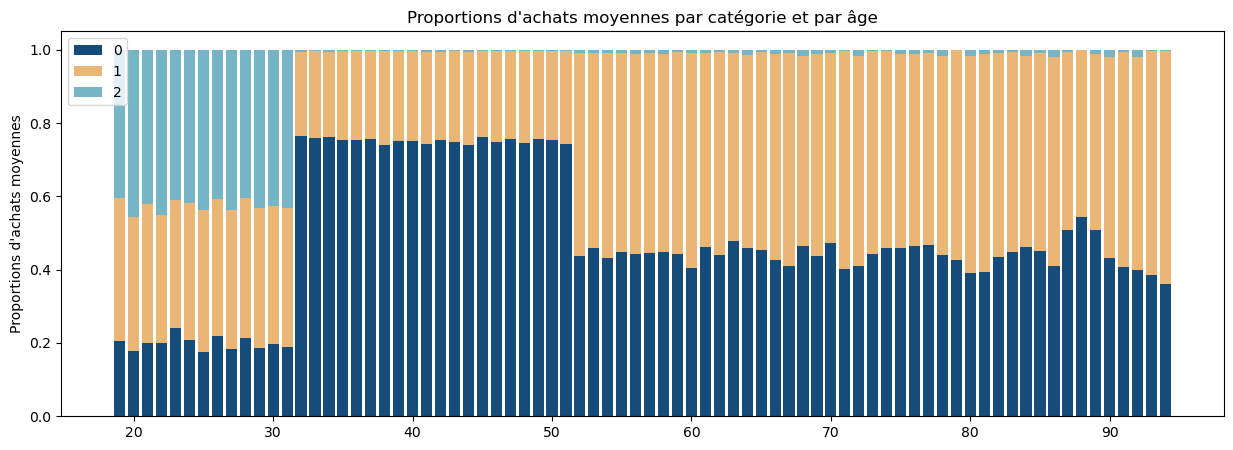

In [189]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot()
ax.bar(proportion_products_per_category_per_client.index,proportion_products_per_category_per_client.iloc[:,0].values,color="#154c79",label="0")
ax.bar(proportion_products_per_category_per_client.index,proportion_products_per_category_per_client.iloc[:,1].values,color="#eab676",bottom=np.array(proportion_products_per_category_per_client.iloc[:,0].values),label="1")
ax.bar(proportion_products_per_category_per_client.index,proportion_products_per_category_per_client.iloc[:,2].values,color="#76b5c5",bottom=(np.array(proportion_products_per_category_per_client.iloc[:,0].values)+np.array(proportion_products_per_category_per_client.iloc[:,1].values)),label="2")
ax.legend(["0","2","1"],loc="upper right")
ax.set_title("Proportions d'achats moyennes par catégorie et par âge")
ax.set_ylabel("Proportions d'achats moyennes")
plt.legend()
plt.show()

Les proportions d’achat par catégorie diffèrent grandement selon l’âge :
- de 19 à 31 ans : intérêt pour toutes les catégories de produits, seule tranche d'âge à avoir un intérêt marqué pour la catégorie 2
- de 32 à 51 ans : intérêt majeur pour les produits de catégorie 0, pas d'intérêt pour la catégorie 2
- de 52 à 95 ans : intérêt équivalent pour les produits de catégorie 0 et 1, pas d'intérêt pour la catégorie 2

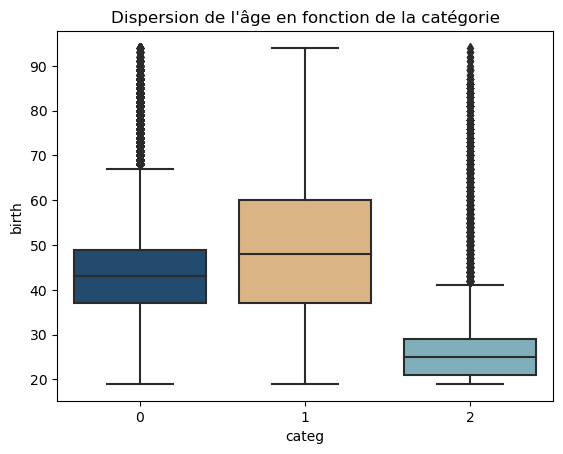

In [190]:
sns.boxplot(x='categ',y=2023-df_final["birth"],data=df_final, palette = ['#154c79','#eab676','#76b5c5'])
plt.title("Dispersion de l'âge en fonction de la catégorie")
plt.show()

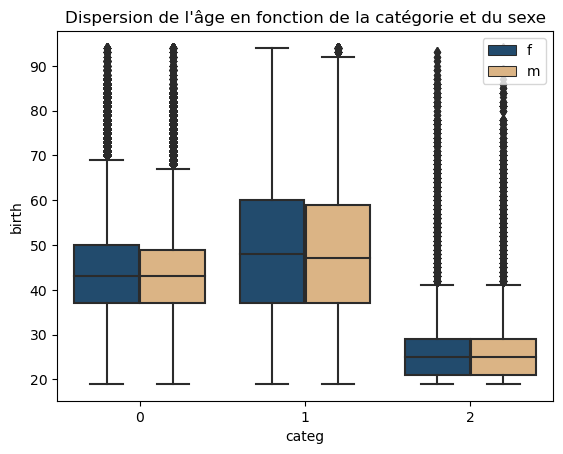

In [191]:
sns.boxplot(x='categ',y=2023-df_final["birth"],data=df_final, hue="sex", palette = ['#154c79','#eab676','#76b5c5'])
plt.legend(loc="upper right")
plt.title("Dispersion de l'âge en fonction de la catégorie et du sexe")
plt.show()

La dispersion des âges est différente selon les catégorie de produits :
- catégorie 0 : 50% des achats effectués par des clients ayant entre 35 et 50 ans, peu d'achats après 65 ans
- catégorie 1 : catégorie grand public, intéresse tous les âges
- catégorie 2 : 50 % des achats effectués par des clients ayant entre 20 et 30 ans, peu d'achats après 40 ans
- pas de différence flagrante si l'on compare la dispersion des âges par catégorie et en fonction du genre

#### Etude qualitatif/qualitatif :  calcul du tableau de contingence, des coefficient ξij et réalisation d'un test du Khi2

- création du tableau de contingence

In [192]:
count2 = df_final.pivot_table(index = "birth", columns = "categ", values = "id_prod", aggfunc="count")

In [193]:
count2.reset_index(inplace=True)
count2["age"] = 2023 - count2["birth"]
count2["tranche d'âge"] = pd.cut(count2["age"],bins = [18,31,51,100])
count2.drop(columns = ["birth","age"], inplace = True)
count2.set_index("tranche d'âge", inplace  = True, verify_integrity = False)
count2 = count2.groupby("tranche d'âge").sum()
count2.index=count2.index.tolist()

In [194]:
count2.loc[:,"total"] = count2.sum(1)
total = pd.DataFrame([[count2[0].sum(),count2[1].sum(),count2[2].sum(),count2["total"].sum()]], columns = [0,1,2,"total"], index=["total"])
count2 = pd.concat([count2,total],axis =0)

- création du tableau des effectifs théoriques et calcul des ξij

In [195]:
tx2 = count2.loc[:,["total"]]
ty2 = count2.loc[["total"],:]
indep2 = tx2.dot(ty2) / n

measure2 = (count2-indep2)**2/indep2
xi_n2 = measure2.sum().sum()
table2 = measure2/xi_n2

In [196]:
print("tableau de contingence :")
count2

tableau de contingence :


,0,1,2,total
"(18, 31]",16697,28087,29879,74663
"(31, 51]",299424,92811,1475,393710
"(51, 100]",71372,91450,1494,164316
total,387493,212348,32848,632689


Tableau des efffectifs théoriques

In [197]:
print("tableau des effectifs théoriques :")
indep2

tableau des effectifs théoriques :


,0,1,2,total
"(18, 31]",45727.663764,25058.976407,3876.359829,74663.0
"(31, 51]",241129.321088,132140.010463,20440.668448,393710.0
"(51, 100]",100636.015148,55149.013130,8530.971722,164316.0
total,387493.000000,212348.000000,32848.000000,632689.0


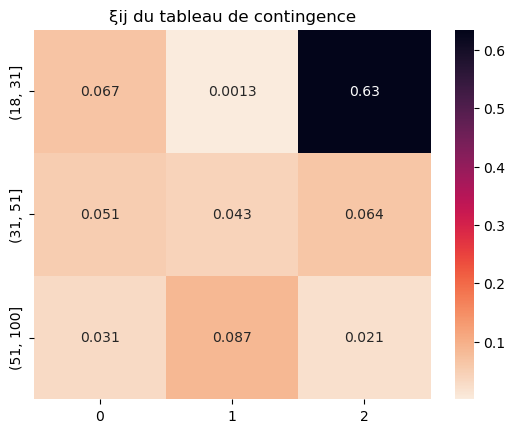

In [198]:
cmap = sns.cm.rocket_r
sns.heatmap(table2.iloc[:-1,:-1],annot=table2.iloc[:-1,:-1], cmap =cmap)
plt.title("ξij du tableau de contingence")
plt.show()

- C'est au sein de la catégorie 2 pour la tranche d'âge 18-31 que l'écart entre les valeurs observées et les valeurs théoriques en cas d'indépendance des deux variables est le plus important
- La case 18-31/cat2 contribue le plus à l'hypothèse de non indépendance des variables

### Interprétation des corrélations liées à l'âge 
Trois profils de clients se distinguent selon leur tranche d'âge :
- **de 19 à 31 ans** 
    - fréquence d'achat : la plus faible
    - panier moyen : le plus élevé
    - CA total : moyen
    - intéret pour toutes les catégories de produits, seule tranche d'âge à avoir un intérêt marqué pour la catégorie 2
- **de 32 à 51 ans**
    - fréquence d'achat : la plus élevée
    - panier moyen : moyen
    - CA total : les plus élevé
    - intérêt majeur pour les produits de catégorie 0, pas d'intéret pour la catégorie 2
- **de 52 à 94 ans**
    - fréquence d'achat : moyenne
    - panier moyen : le plus faible
    - CA total : le plus faible
    - intérêt équivalent pour les produits de catégorie 0 et 1, pas d'intéret pour la catégorie 2

<a id = "IV"></a> <br>
<html><font color='brown', size = "+3"><strong><u> IV . Lien entre les références 0-525 et 2-159 </u></strong></font></html>

On rappelle la formule des probabilités conditionnelles entre deux évenements :

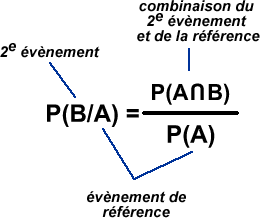

- La fréquence empirique est ici utilisée comme estimateur de la probabilité
- La probabilité qu'un client achète la référence 2_159 est estimée par la proportion de clients ayant acheté 2_159.
- La probabilité qu'un client achète 2_159 et 0_525 est estimée par la proportion de clients ayant acheté les deux références 

In [199]:
c_2_159 = df_final[df_final['id_prod']=='2_159']['client_id']
c_2_159 = set(c_2_159.unique())
len(c_2_159) 

526

526 clients uniques ont acheté la référence 2_159

In [200]:
c_0_525 = df_final[df_final['id_prod']=='0_525']['client_id']
c_0_525 = set(c_0_525.unique())
len(c_0_525)

455

455 clients uniques ont acheté la référence 0_525
- combien de clients ont achété 2_159 et 0_525 ?

In [201]:
c_0_525_et_2_159 = c_2_159.intersection(c_0_525)
c_0_525_et_2_159
len(c_0_525_et_2_159)

455

In [202]:
len(c_0_525_et_2_159.intersection(c_0_525))

455

- tous les clients ayant acheté 0_525 ont aussi acheté 2_159 : 
    - l'évènement acheter 0_525 est donc inclus dans l'évènement acheter 2_159 
    - la probabilité d'acheter 0_525 et 2_159 est donc égale à la probabilité d'acheter 0_525

In [203]:
p_2_159 = len(c_2_159) / len (df_final["client_id"].unique())
p_0_525_et_2_159 = len(c_0_525) / len (df_final["client_id"].unique())

In [204]:
p0_525_sachant_2_159=round(p_0_525_et_2_159 /p_2_159,3)
print("la probabilité qu'un client achète l'article '0_525' sachant qu'il a acheté l'article '2_159' est de ",p0_525_sachant_2_159)

la probabilité qu'un client achète l'article '0_525' sachant qu'il a acheté l'article '2_159' est de  0.865


<a id = "V"></a> <br>
<html><font color='brown', size = "+3"><strong><u> V . Conclusion</u></strong></font></html>

### Pricipaux éléments d'analyse

**CA et nombre de ventes au global :**
- Le chiffre d'affaire généré depuis le 2021-03-01 est de 11856820.47€ pour un total de 679332 ventes
- **CA mensuel et nombre de ventes moyens : 494034.19 € pour 28305.5 ventes**
- Le mois d’**octobre 2021** est marqué par une **chute du CA généré par la catégorie 1** (aucune vente entre le 02 et le 27 octobre sur cette catégorie)
- La moyenne mobile calculée sur les trois derniers mois montre une  **relative stabilité du CA mensuel** aux alentours de 500000€, marqué tout de même par une **période de croissance du CA entre mars et septembre 2021**, une c**hute liée à la perte de CA du mois d’octobre** suivie d’un **regain immédiat d’activité**, puis une période de **faible décroissance depuis un an**

**CA et  nombre de ventes par catégorie :**
- **Catégorie 0** : 
    - prix les plus faibles, **le plus grand nombre de ventes**. 
    - 50% des achats sont effectués par des clients ayant entre 35 et 50 ans, peu d'achats après 65 ans
- **Catagorie 1** : 
    - prix moyens, **catégorie la plus rémunératrice (CA)**
    - **catégorie grand public, qui intéresse tous les âges**
    - lien entre la catégorie 1 et le sexe : le nombre d'achat catégorie 1 est légérement plus élevé chez les **femmes** que le nombre d'achat théorique
- **Catégorie 2** : 
    - prix les plus élevés,
    - 50 % des achats sont effectués par des clients ayant entre **20 et 30 ans**, peu d'achats après 40 ans
- **Les proportions CA  et nombre de ventes par catégorie sont relativement stables dans le temps**

**CA et  nombre de ventes par clients :**
- Un client a généré en moyenne 1378.70€ de CA pour 79 ventes
- **50% du CA est concentré par 21% des plus gros clients** 
- Parmi les clients les plus importants :
    - 4 clients ont généré un nombre beaucoup plus élevé de ventes et de CA que la moyenne : **clients BtoB** ?
    - Ces quatres outliers ont été enlevés des données pour le reste des analyses
- Les graphiques semblent montrer qu'il n'y a **pas de différence flagrante entre les dépenses effectuées par les hommes et celles effectuées par les femmes**
- En revanche qu’il semble exister des **différences en fonction de l’âge**

**Profils des clients et habitudes d'achat :**
- 8596 clients actifs
- Moyenne d’âge : **45 ans**
- Distribution de l’âge identique entre femmes et hommes 
- **Parmi les clients : 52 % de femmes , 48 % d’hommes**
- 319274 sessions d’achat ont été réalisées en deux ans, soit 37 par client
- En moyenne, 13303.08 sessions sont réalisées par mois, soit 1,5 sessions par clients
- **La proportion de sessions réalisées par les femmes est supérieure à 52%**
- Le montant du panier moyen par client est de 40,38 euros, la distribution des paniers moyens est identique entre femmes et hommes

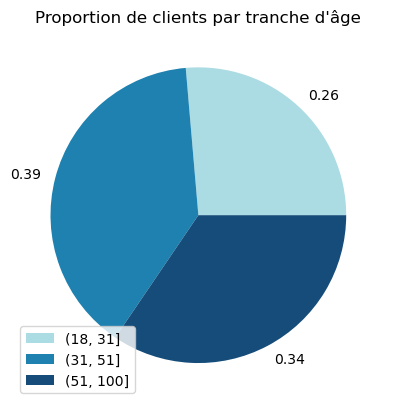

In [205]:
fig = plt.figure()
ax = fig.add_subplot()
ax.pie(panier_moyen_par_client.groupby("tranche d'âge").count()["client_id"], 
        labels =round(panier_moyen_par_client.groupby("tranche d'âge").count()["client_id"]/panier_moyen_par_client.groupby("tranche d'âge").count()["client_id"].sum(),2),
        colors = ['#abdbe3','#1e81b0','#154c79'])
ax.legend(panier_moyen_par_client.groupby("tranche d'âge").count().index, loc = "lower left")
ax.set_title("Proportion de clients par tranche d'âge")
plt.show()

**Trois profils de clients se distinguent selon leur tranche d'âge :**
- **de 19 à 31 ans** 
    - fréquence d'achat : la plus faible
    - **panier moyen : le plus élevé**
    - CA total : moyen
    - **intéret pour toutes les catégories de produits, seule tranche d'âge à avoir un intérêt marqué pour la catégorie 2**

- **de 32 à 51 ans**
    - **fréquence d'achat : la plus élevée**
    - panier moyen : moyen
    - **CA total : les plus élevé**
    - **intérêt majeur pour les produits de catégorie 0**, pas d'intérêt pour la catégorie 2
- **de 52 à 94 ans**
    - fréquence d'achat : moyenne
    - **panier moyen : le plus faible**
    - **CA total : le plus faible**
    - **intérêt équivalent pour les produits de catégorie 0 et 1**, pas d'intéret pour la catégorie 2

### Recommandations

**Concernant nos données :**

- Intégrer la référence **0_2245** dans la base "products"

**Recommandation concernant l'offre produit**

- Compléter l’analyse des produits par le CA réalisée par une **analyse de la rentabilité et de l'âge des produits** (50% du CA réalisé est généré par 7 % des produits, certains produits ne se sont pas vendus depuis le lancement du site) 

**Concernant les analyses :**

- Une meilleure identification des clients **BtoB** et de leurs caractéristiques pour une analyse plus précise du segment
   - exemples de caractéristiques organisation : attributs de l’organisation, localisation, niveau de chiffre d’affaire, taille, ancienneté

- Identification d'autres caractéristiques clients **BtoC** pour une segmentation plus fine
     - exemples d'autres caractéristiques : profession, centres d'intérêt

**Concernant l'objectif de croissance du chiffre d'affaire par client :**

- Les leviers d'action pourraient être différents en fonction du segment :
    - pour le segment 19 à 31 ans : augmenter la **fréquence d'achat**
    - pour le segmente 32 à 51 ans : augmenter la **valeur du panier moyen**
    - pour le segmente 52 à 94 ans : augmenter le **panier moyen et la fréquence d'achat**

Exemples d'actions visant à augmenter le panier moyen : 
- proposer des **produits complémentaires**/alternatifs/up-selling
    - ex : lien entre références 0_525 et 0_259
- mettre en avant les promotions sur le site, créer des ventes flash
- définir un seuil au-delà duquel les frais de livraison sont offerts


Exemples d'actions visant à augmenter la fréquence d'achat :
- lancer un programme de **fidélisation**
- relancer les **abandonnistes**, les **clients inactifs** (calcul de la récence)
- **cibler les campagnes marketing** :
    - en fonction de la tranche d'**âge** par exemple
    - en fonction de la **récence/fréquence** de achats
    - pas de ciblage particulier en fonction du genre
- améliorer l’expérience utilisateur sur le site internet :
    - améliorer les fiches produit, ajouter une fonction ciblée recherche de produit, simplifier le tunnel d’achat (retravailler les boutons call-to-action, moyens de paiement divers...)


<a href = "#Sommaire"> Retour au sommaire </a>